# PRCP-1013- WalkRun Class

## Table of Contents

##### 1.Importing Necessary Libraries
##### 2.Load Datasets
##### 3.Exploratory Data Analysis
##### 4.Data Preprocessing
##### 5.Feature Selection
##### 6.Model Implementation
##### 7.Model Evaluation
##### 8.Model Comparison Report
##### 9.Challenges Faced Report
##### 10.Conclusion

## Business Case

###  To classify activities as either "walking" or "running" based on the provided input features.

## Objectives

- **Exploratory Data Analysis (EDA):** Analyze the dataset to identify patterns, trends, and anomalies using statistical methods and visualizations, focusing on time-series characteristics.  
- **Data Preparation:** Clean, preprocess, and structure the data for compatibility with Recurrent Neural Network (RNN) architectures such as Simple RNN, LSTM, and GRU.  
- **Model Building:** Design and implement neural network models, including Simple RNN, LSTM, and GRU, to classify activities as walking or running based on the input features.  
- **Model Selection and Training:** Train each neural network model and compare their performance to identify the most effective architecture for the classification task.  
- **Hyperparameter Optimization:** Fine-tune parameters such as learning rate, batch size, and number of units to improve model performance. 
- **Performance Evaluation:** Validate model accuracy using metrics like F1 Score, Accuracy, Precision, Recall, and the ROC-AUC Curve to ensure robust predictions.
- **Model Interpretation:** Provide insights into the behavior of the best-performing model, highlighting feature importance and temporal patterns contributing to classification decisions.

## Importing Necessary Libraries

In [177]:
# Data Manipulation and Numerical Libraries
import pandas as pd  
import numpy as np  
import random 

# Data Visualization Libraries
import matplotlib.pyplot as plt  
%matplotlib inline  
import seaborn as sns  

# Handling Warnings and Debugging  
import warnings  
warnings.filterwarnings('ignore')  

# Data Preprocessing and Feature Engineering
from sklearn.preprocessing import StandardScaler

# Data Splitting and Model Tuning 
from sklearn.model_selection import train_test_split 

# Machine Learning and Deep Learning Frameworks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import backend as b_end
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy

# Neural Network Layers and Optimization
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, LSTM, GRU, Input
from tensorflow.keras.optimizers import Adam

# Model Evaluation and Performance Metrics
from sklearn.metrics import (f1_score, 
            accuracy_score, 
            precision_score, 
            recall_score, 
            classification_report,
            confusion_matrix, 
            roc_curve, 
            auc, 
            ConfusionMatrixDisplay)

## Loading Data

In [11]:
# Importing the dataset
df = pd.read_csv("walkrun.csv")

## Domain Analysis

#### Feature Information  

- **Date**: The calendar date when the data was recorded.  
- **Time**: The specific time (with milliseconds) of data recording.  
- **Acceleration_X**: Acceleration along the X-axis, indicating side-to-side movement, measured in m/s² or g. Positive values represent rightward motion; negative values represent leftward motion.  
- **Acceleration_Y**: Acceleration along the Y-axis, typically vertical. Positive values indicate upward movement; negative values indicate downward motion.  
- **Acceleration_Z**: Acceleration along the Z-axis, representing depth. Positive values indicate movement away from the plane; negative values indicate movement toward the plane.  
- **Gyro_X**: Angular velocity around the X-axis, indicating rotation around the horizontal axis, measured in degrees or radians per second.  
- **Gyro_Y**: Angular velocity around the Y-axis, indicating rotation around the vertical axis.  
- **Gyro_Z**: Angular velocity around the Z-axis, indicating rotation around the depth axis.  
- **Wrist**: Indicates the device's placement or status; ``0`` means the device is either not worn on the wrist or the wrist sensor is inactive, while ``1`` means it is worn on the wrist or the wrist sensor is active. Even when the value is ``0``, data is still recorded, possibly from other sensor placements or a passive wrist sensor.  
- **Activity**: The activity label (e.g., ``0`` for walking, ``1`` for running), indicating the physical activity being performed (target variable).  



### Basic checks

In [15]:
# Top 3 rows
df.head(3)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367


In [16]:
# Bottom 3 rows
df.tail(3)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [17]:
# Dimensions of rows and columns
df.shape

(88588, 11)

In [18]:
# Total size of the dataset
df.size

974468

In [19]:
# Column names
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


### Insights

- This dataset contains **88588 records**, **9 feature columns** and **1 target column**.
- The dataset have a total of **974468 entries** and **no null values**.

## Exploratory Data Analysis

In [24]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [25]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S:%f')

In [26]:
df = df.sort_values("datetime")
df.reset_index(drop=True,inplace=True)
df.head(3)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,datetime
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,2017-06-30 13:51:15.847724020
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,2017-06-30 13:51:16.246945023
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,2017-06-30 13:51:16.446233987


In [27]:
df.drop(columns="datetime", axis=1 , inplace= True)
df.head(3)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367


### Univariate analysis

In [29]:
numeric_cols = [ 'acceleration_x', 'acceleration_y', 'acceleration_z','gyro_x', 'gyro_y', 'gyro_z']

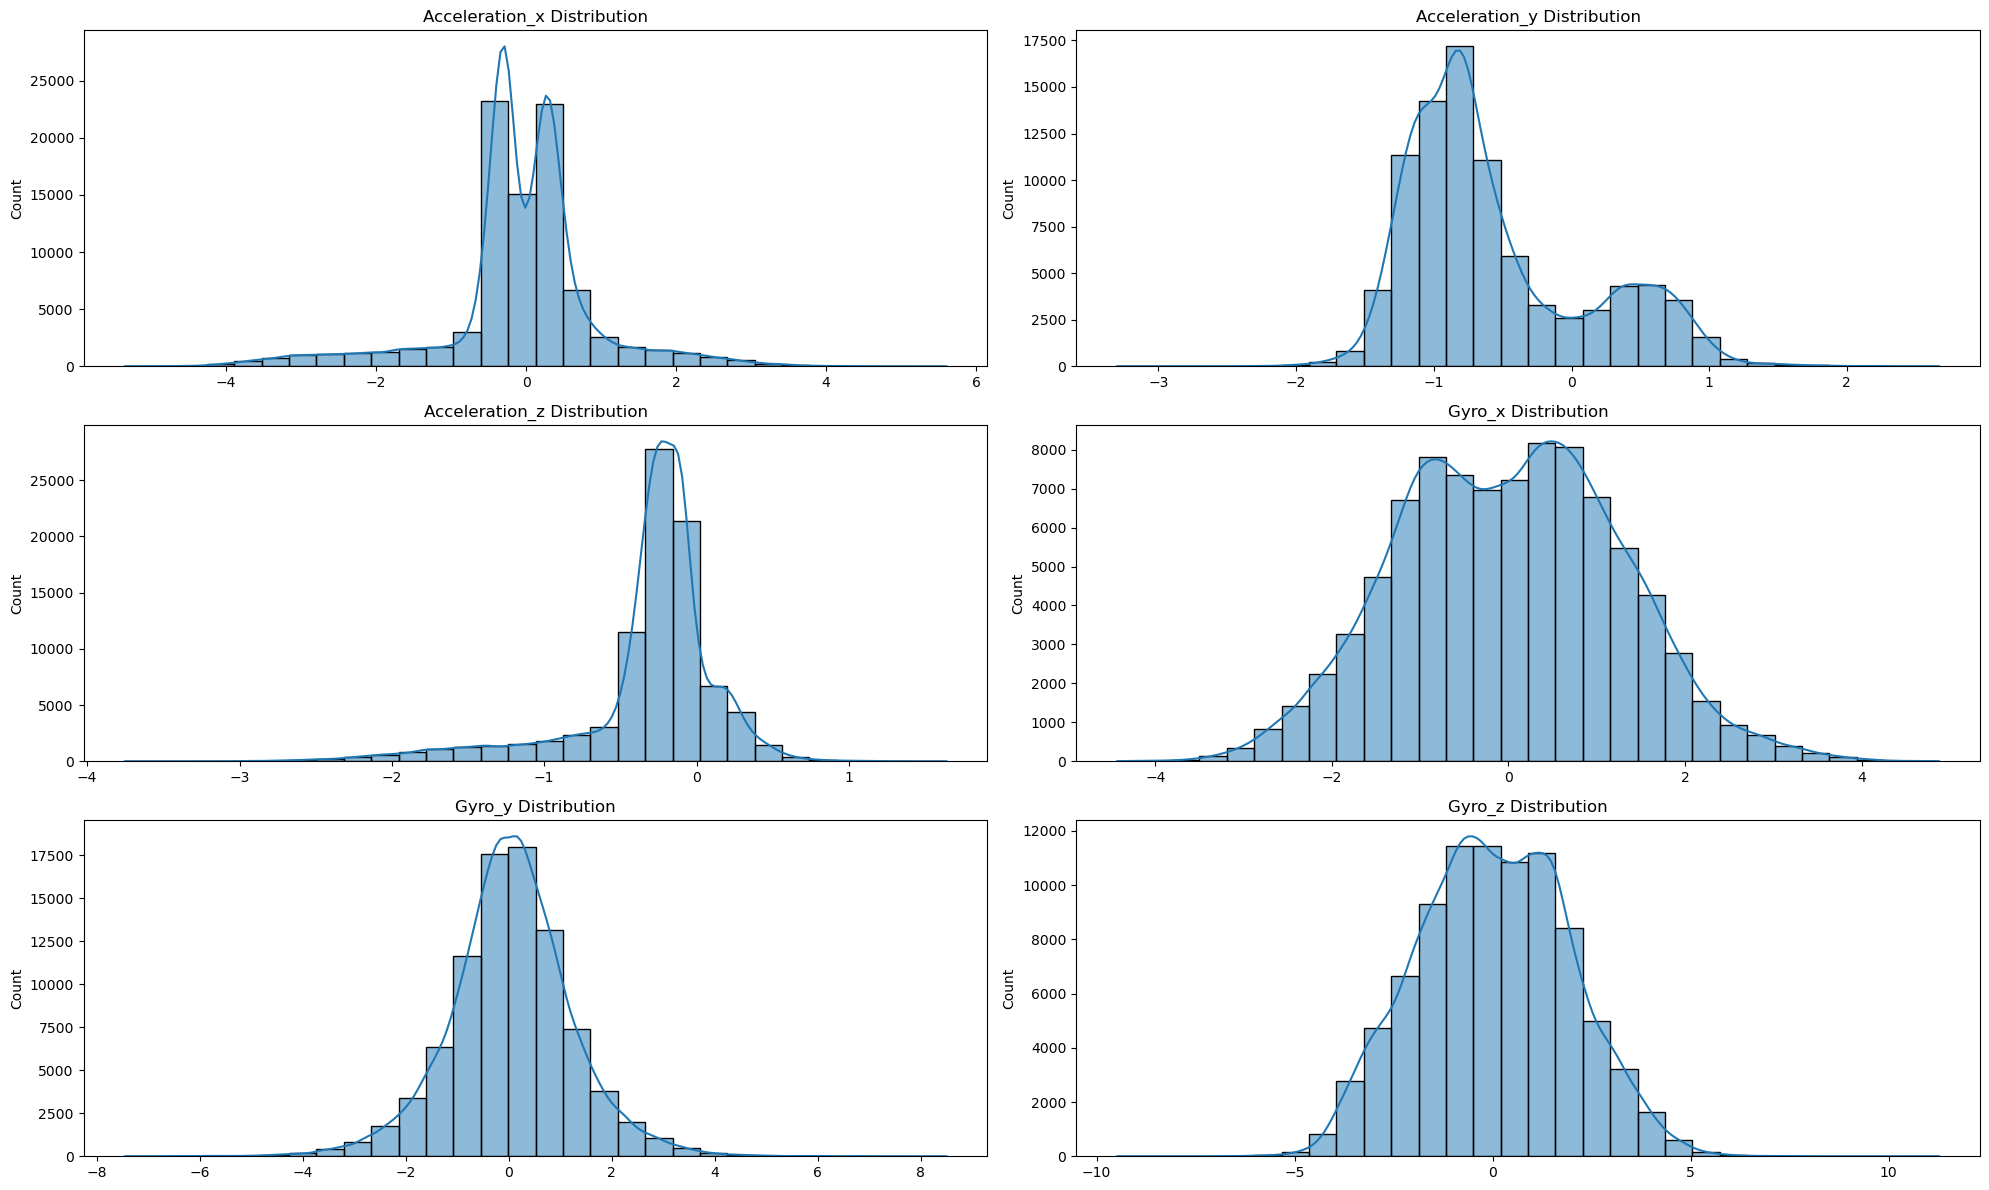

In [30]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3,2, i+1) 
    sns.histplot(df[col], bins=30, kde=True)
    plt.xlabel('')
    plt.title(f'{col.capitalize()} Distribution')
    i+=i
plt.tight_layout()
plt.show()

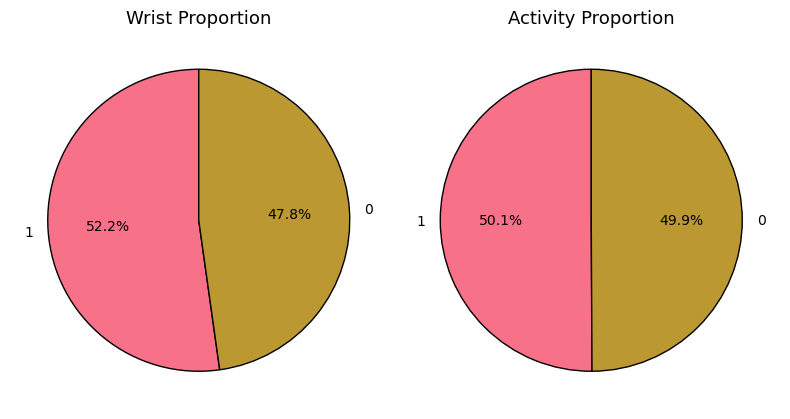

In [31]:
plotnumber = 1
plt.figure(figsize=(8, 8))
for i in df[['wrist','activity']]:
    plt.subplot(1, 2, plotnumber)
    values = df[i].value_counts()
    plt.pie(
        values,
        labels=values.index,
        autopct='%1.1f%%',  
        startangle=90,
        colors=sns.color_palette('husl'),  
        wedgeprops={'edgecolor': 'black'} ) 

    plt.title(f'{i.capitalize()} Proportion', fontsize=13)
    plotnumber += 1
plt.tight_layout()
plt.show()

### Bivariate analysis

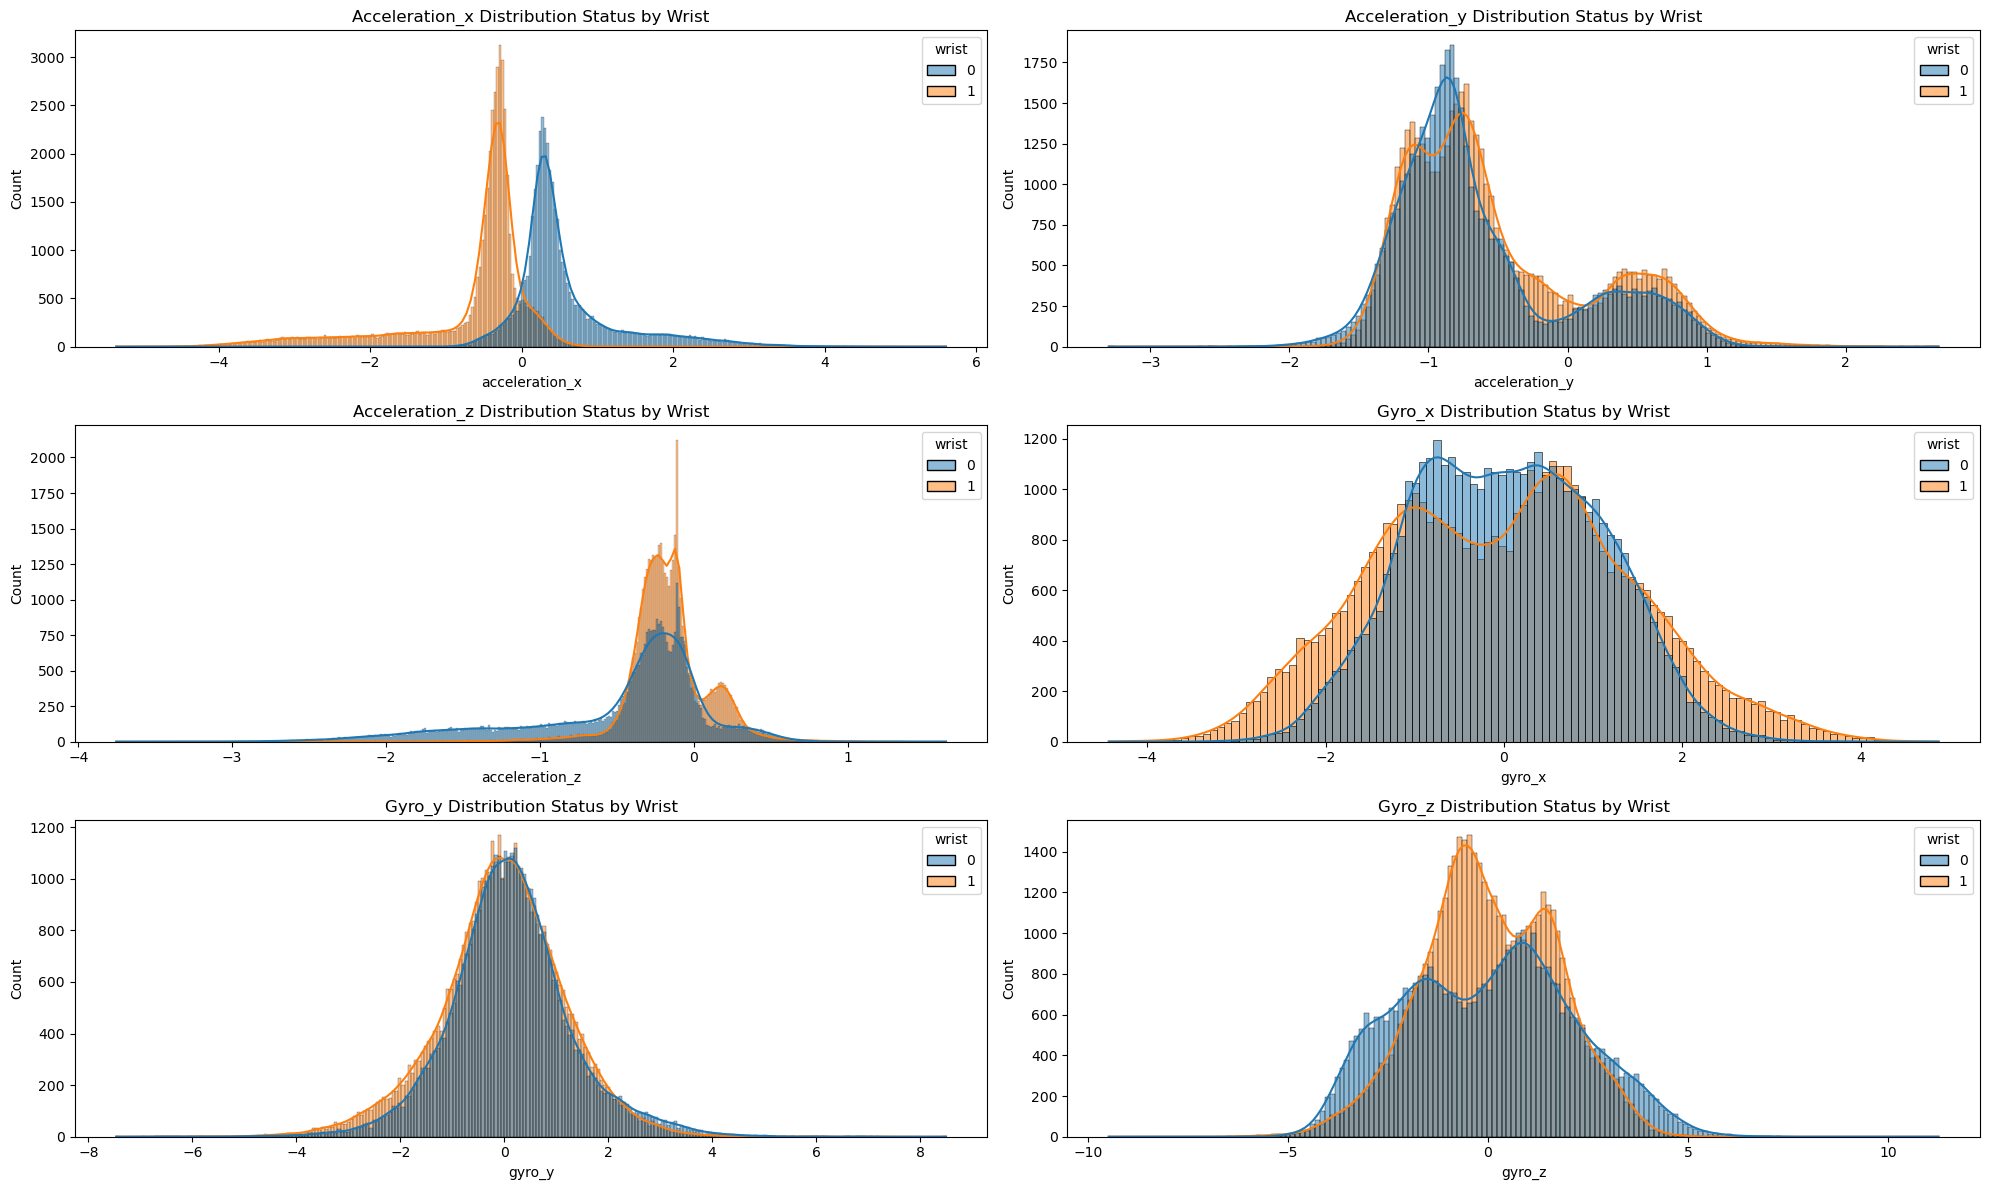

In [34]:
plt.figure(figsize=(20,12))
w = 1
for i in numeric_cols:
    plt.subplot(3,2,w)
    sns.histplot(x = i, data  =df, hue = "wrist", kde= True)
    plt.title(f'{i.capitalize()} Distribution Status by Wrist')
    w+=1
plt.tight_layout()
plt.show()

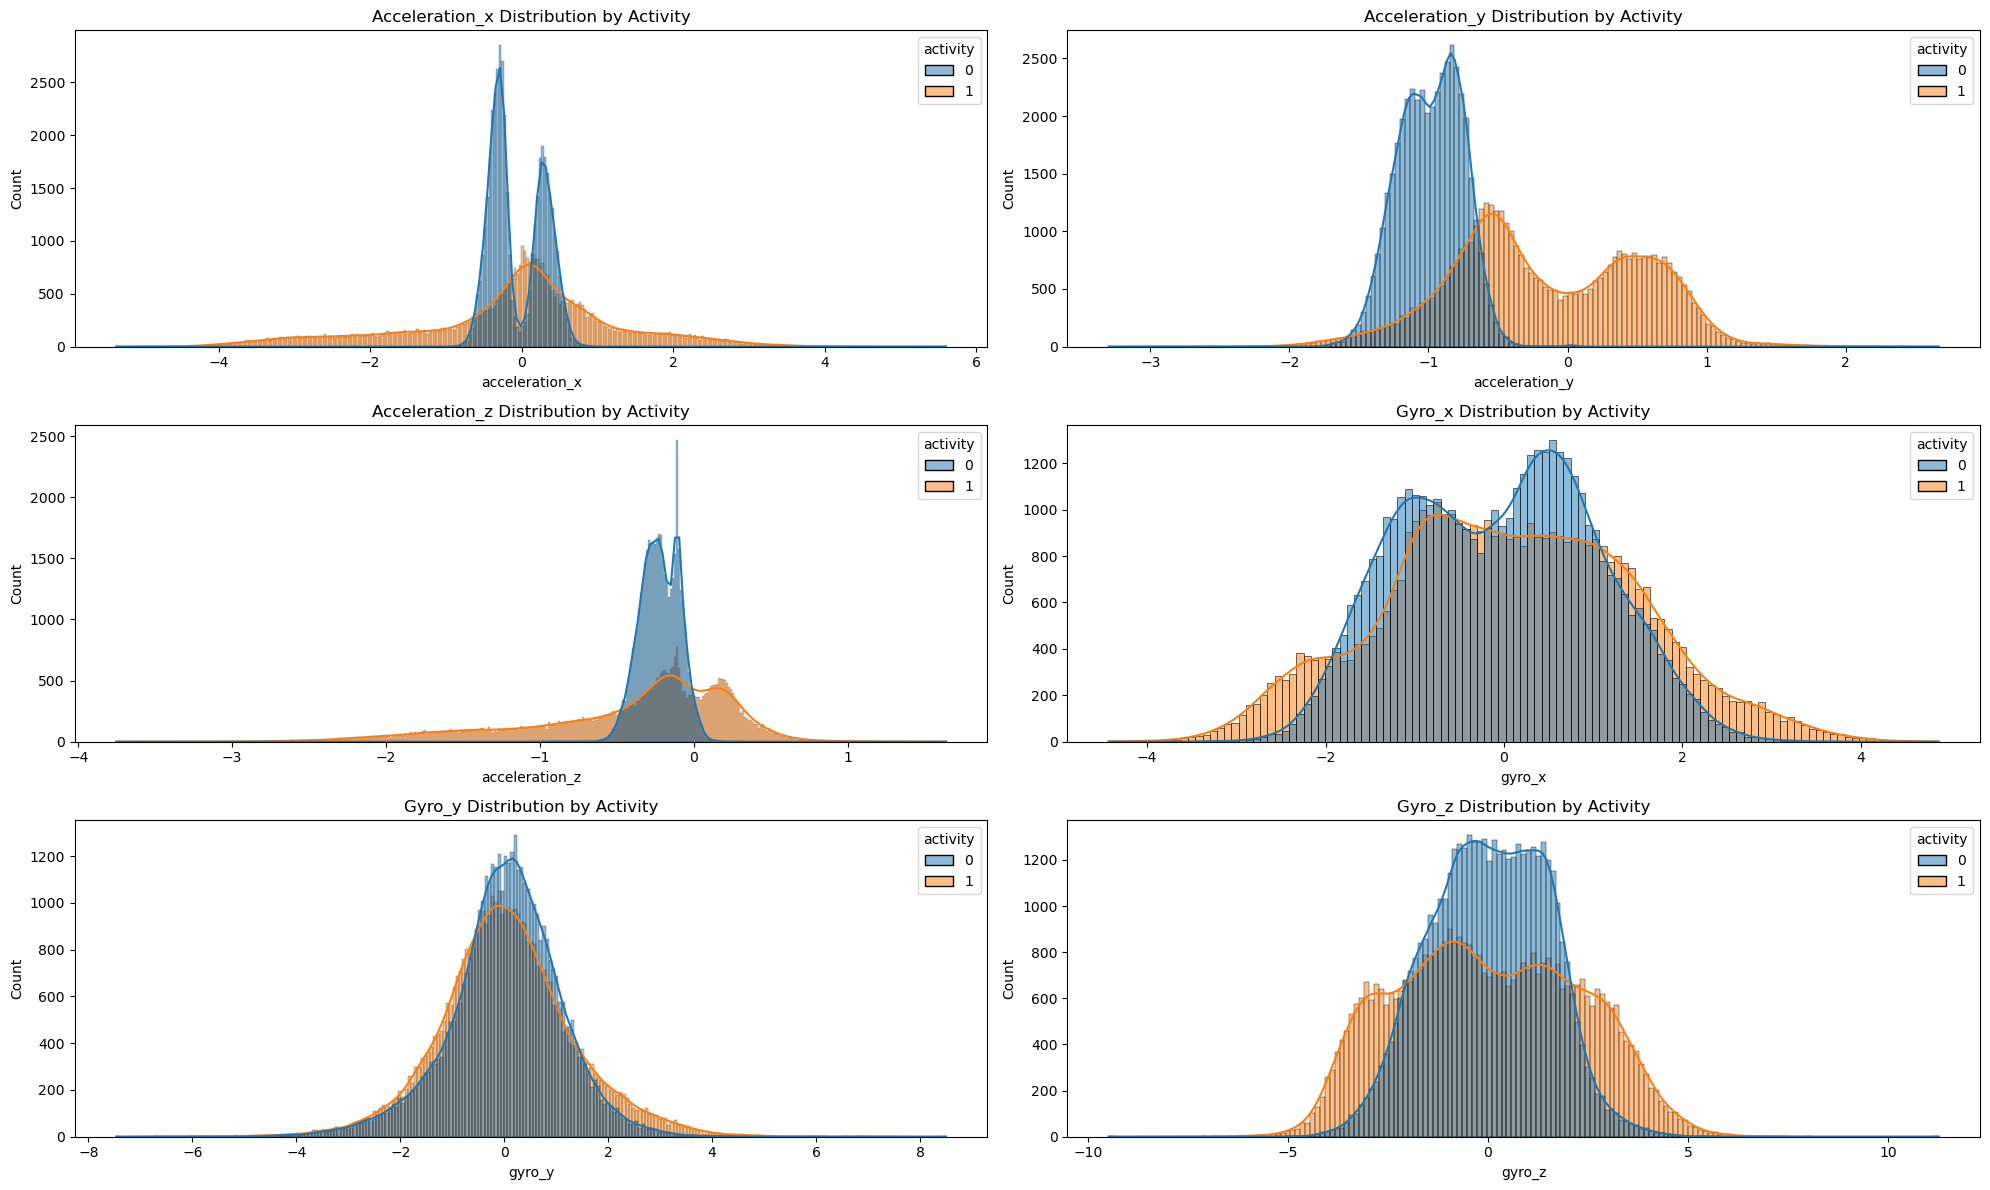

In [35]:
plt.figure(figsize=(20,12))
w = 1
for i in numeric_cols:
    plt.subplot(3,2,w)
    sns.histplot(x = i, data  =df, hue = "activity", kde= True)
    plt.title(f'{i.capitalize()} Distribution by Activity')
    w+=1
plt.tight_layout()
plt.show()

### Multivariate analysis

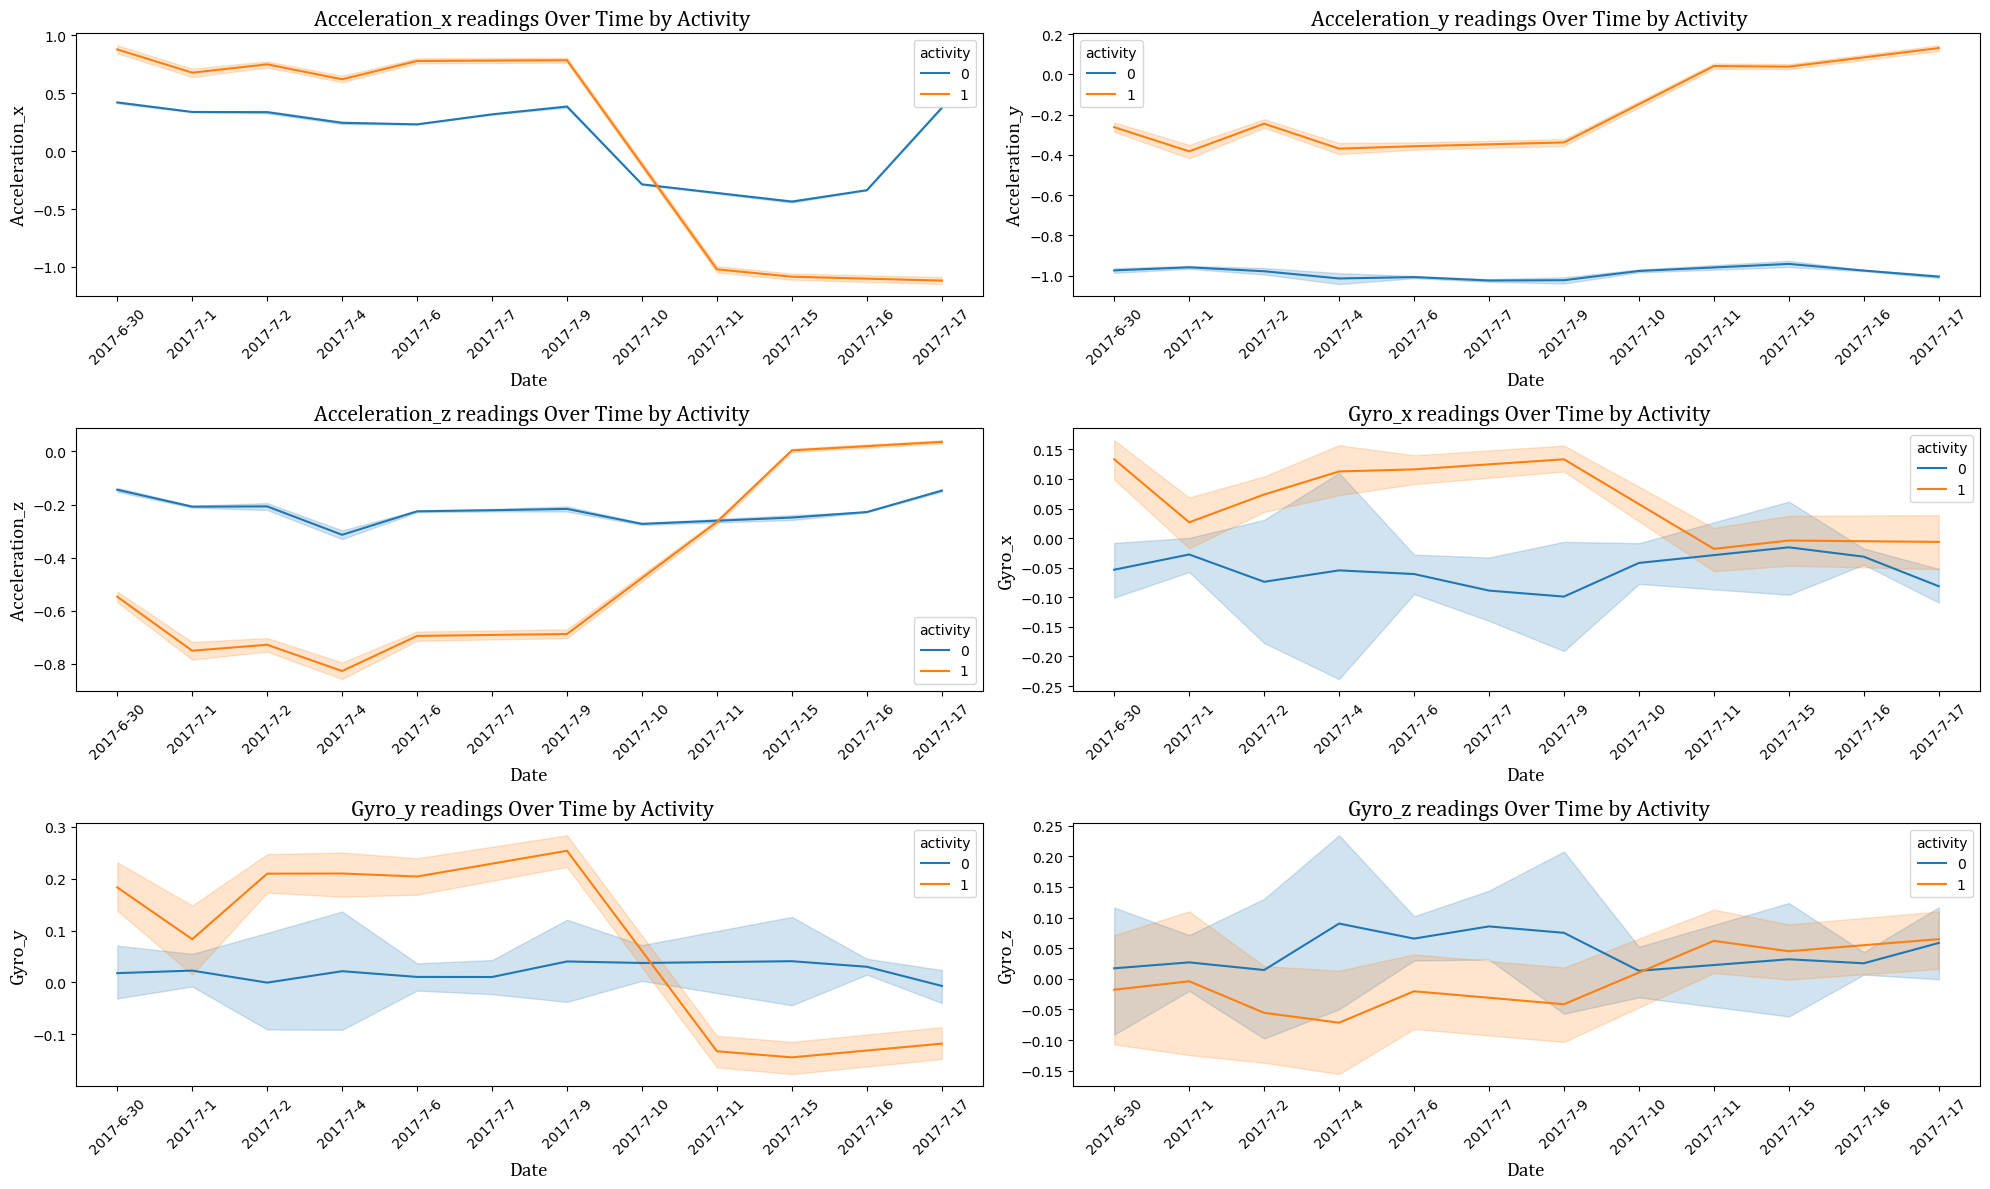

In [37]:
plt.figure(figsize=(20,12))
w = 1
for i in df.drop(columns=["date", "time","username", "wrist", "activity"]):
    plt.subplot(3,2,w)
    sns.lineplot(x = "date" , y = i , data  =df, hue = "activity")
    plt.xticks(rotation = 45)
    plt.xlabel('Date',fontsize=14,fontfamily='Cambria')
    plt.ylabel(f'{i.capitalize()}',fontsize=14,fontfamily='Cambria')
    plt.title(f' {i.capitalize()} readings Over Time by Activity',fontsize=16,fontfamily='Cambria')
    w+=1
plt.tight_layout()

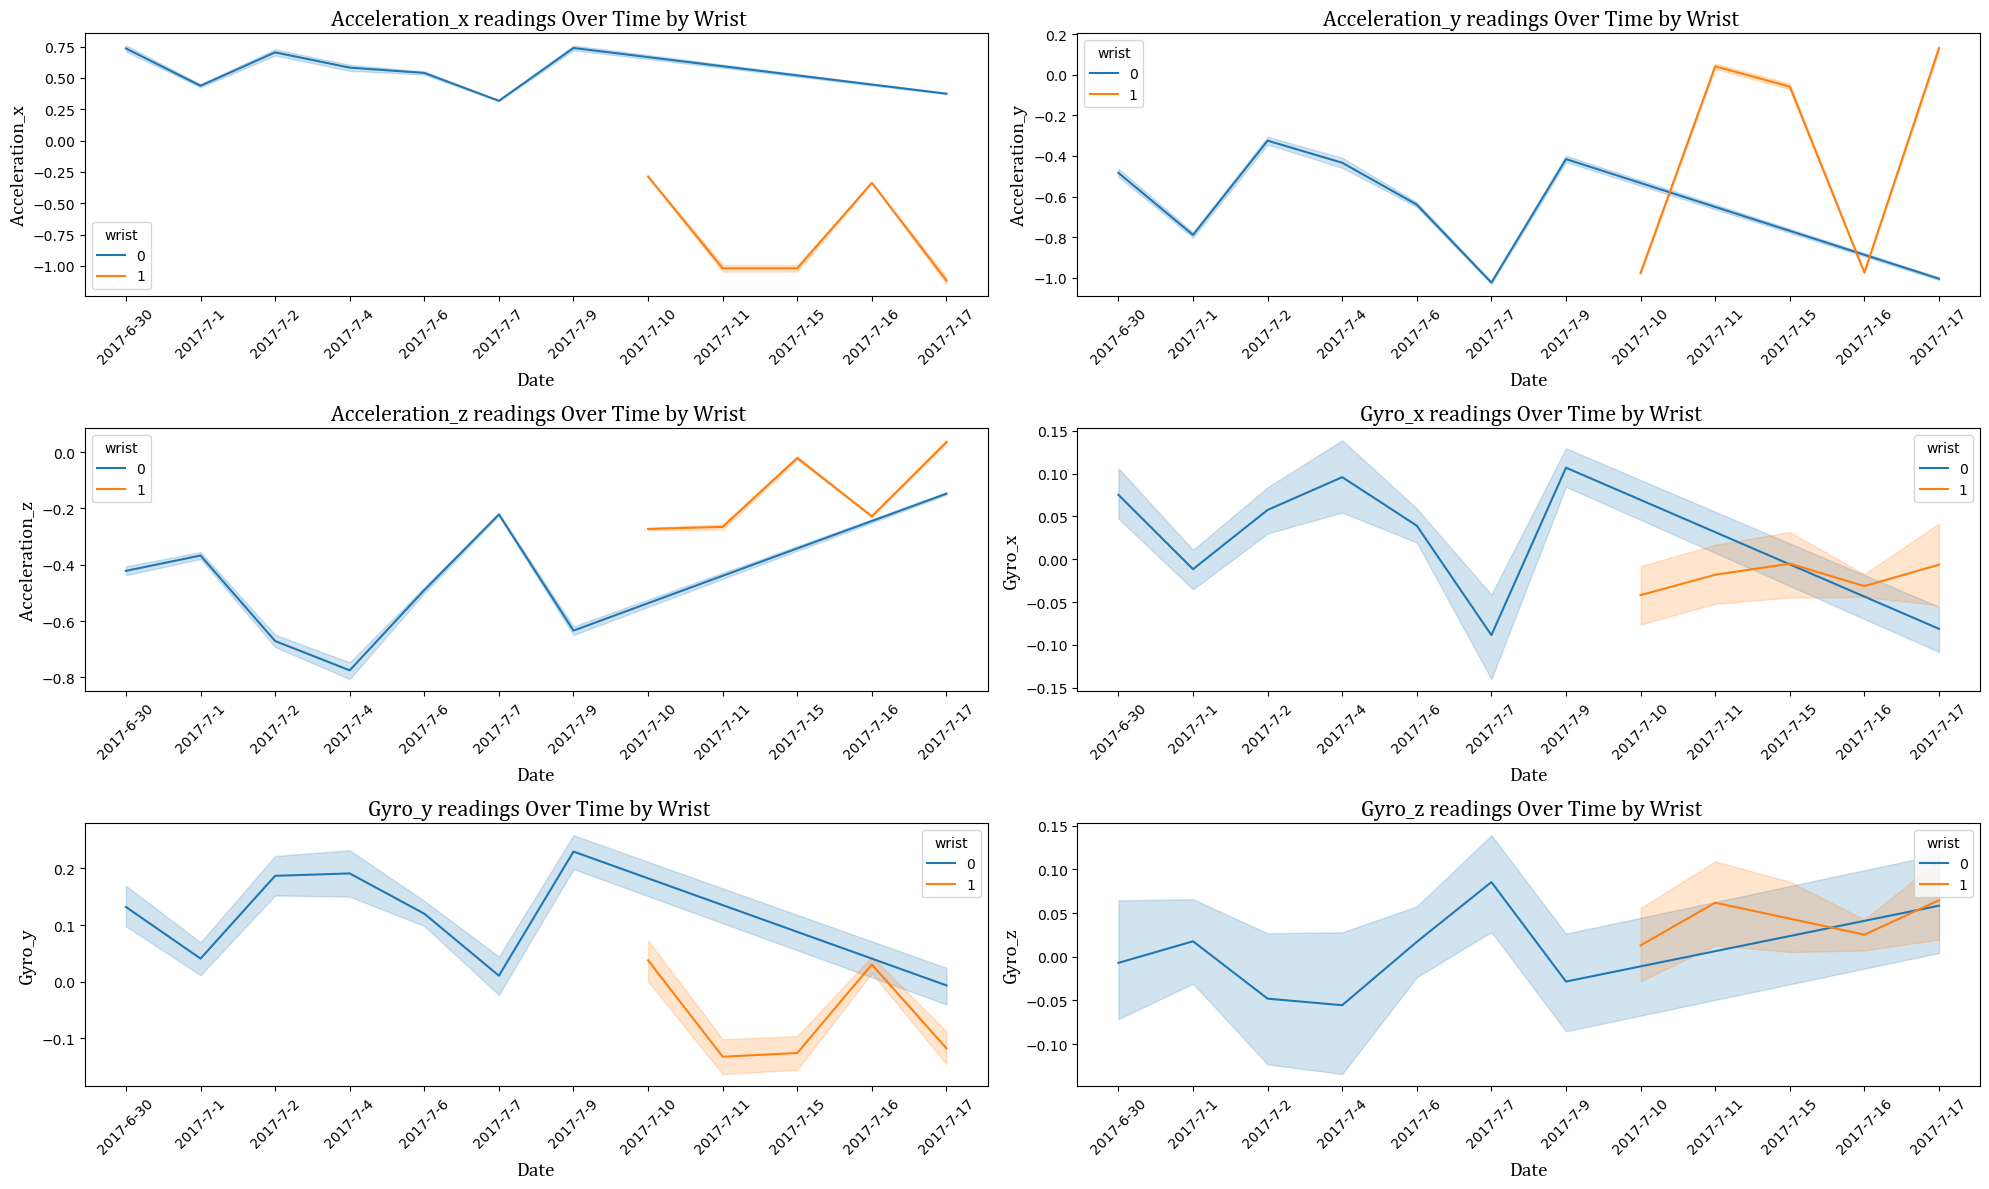

In [38]:
plt.figure(figsize=(20,12))
w = 1
for i in df.drop(columns=["date", "time","username", "wrist", "activity"]):
    plt.subplot(3,2,w)
    sns.lineplot(x = "date" , y = i , data  =df, hue = "wrist")
    plt.xticks(rotation = 45)
    plt.xlabel('Date',fontsize=14,fontfamily='Cambria')
    plt.ylabel(f'{i.capitalize()}',fontsize=14,fontfamily='Cambria')
    plt.title(f' {i.capitalize()} readings Over Time by Wrist',fontsize=16,fontfamily='Cambria')
    w+=1
plt.tight_layout()

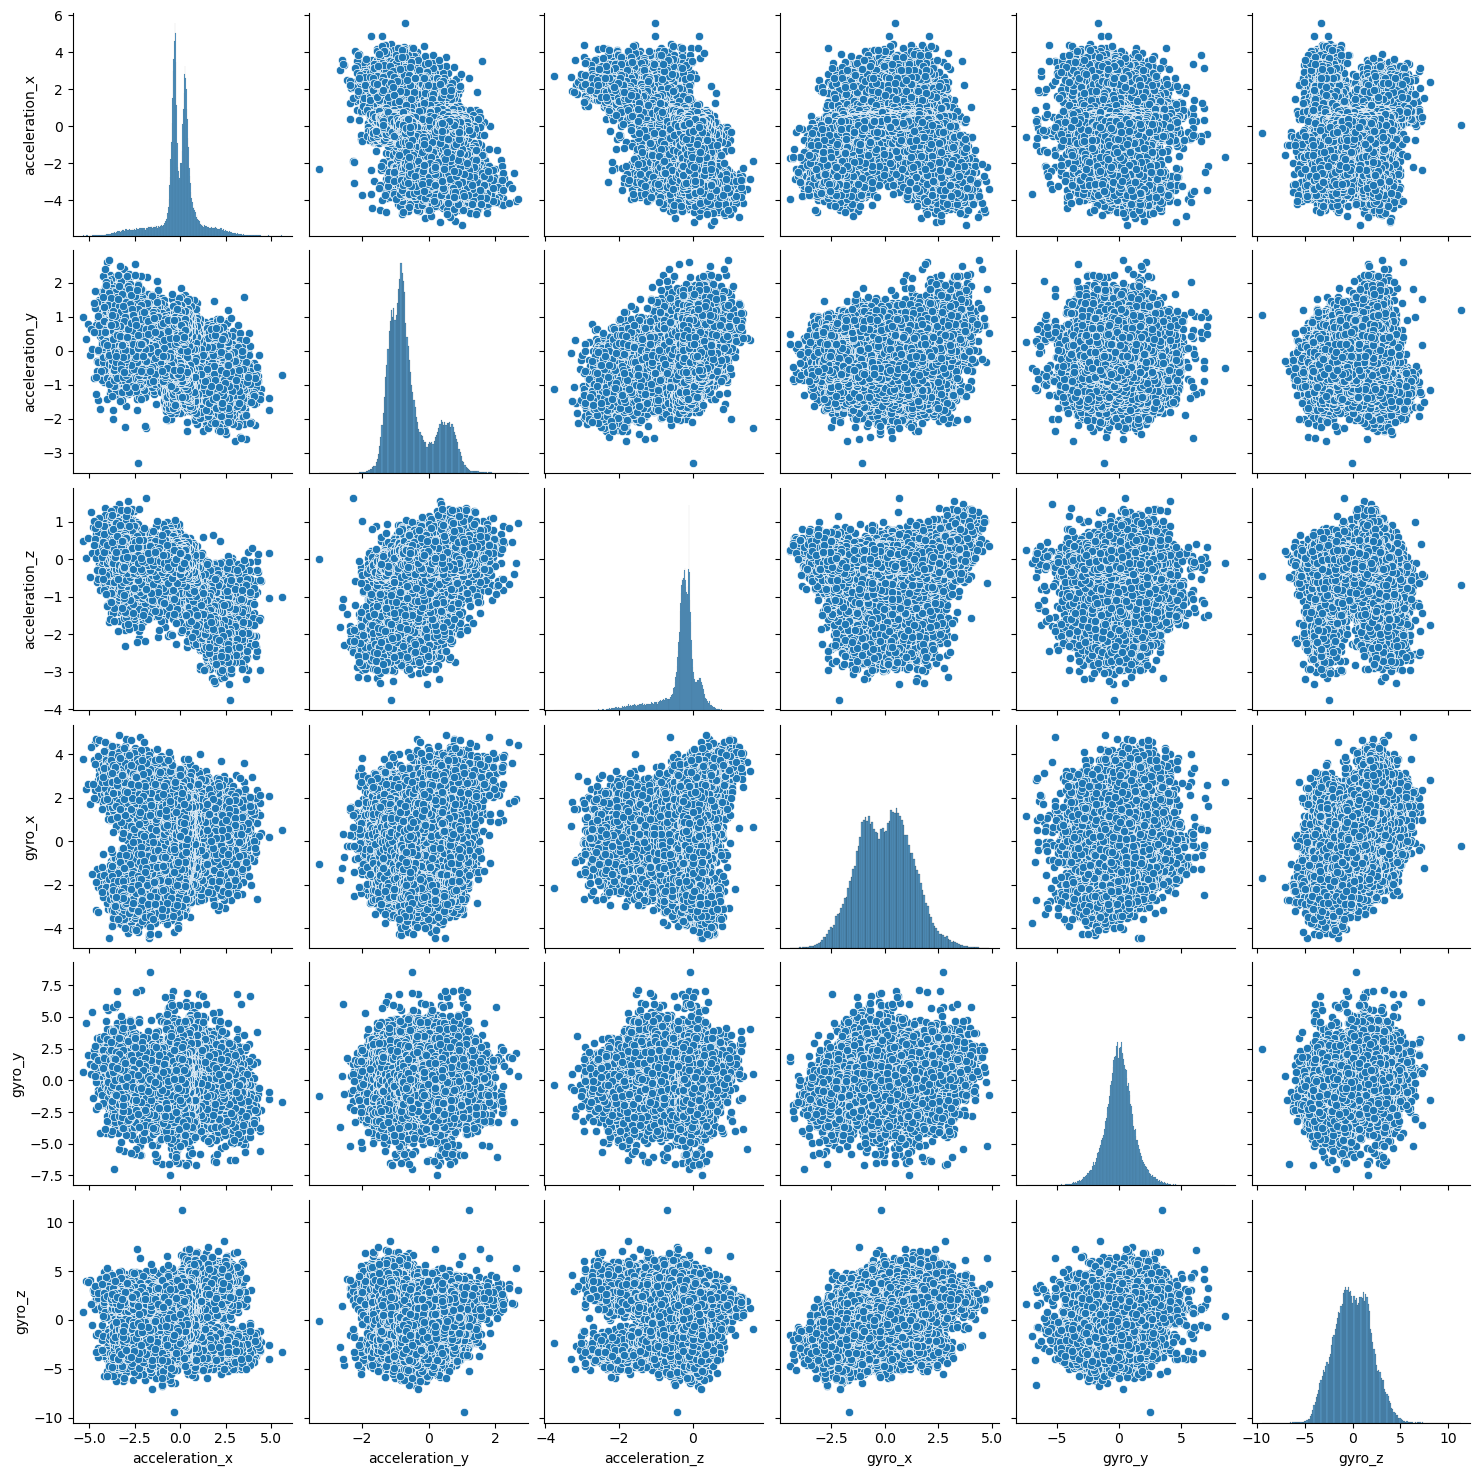

In [39]:
sns.pairplot(df[numeric_cols])
plt.show()

### Insights from EDA
- **Wrist**: The device is worn on the wrist about 52% of the time, with a balanced distribution between wrist-worn (``1``) and non-wrist-worn (``0``) states. Notably, the wrist value is ``1`` only after **2017-7-10**, as observed from the data.
- **Activity**: The activity data is equally split between two types, with a balanced representation of walking (``0``) and running (``1``).
- **Acceleration**: Acceleration values show significant variability, with the most variation observed in the X and Y axes. Negative values in the X and Y axes suggest more leftward and downward motion, possibly indicating different walking or running patterns.
- **Gyroscope**: Gyroscopic data are highly spread from the line, indicating diverse rotational movements and significant deviations in orientation, as observed from line plots.


## Feature Engineering / Data Preprocessing

### Checking null values

In [43]:
df.drop(columns=['date', 'time', 'username'], axis=1,inplace=True)

In [44]:
df.isnull().sum()

wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

### Checking Outliers

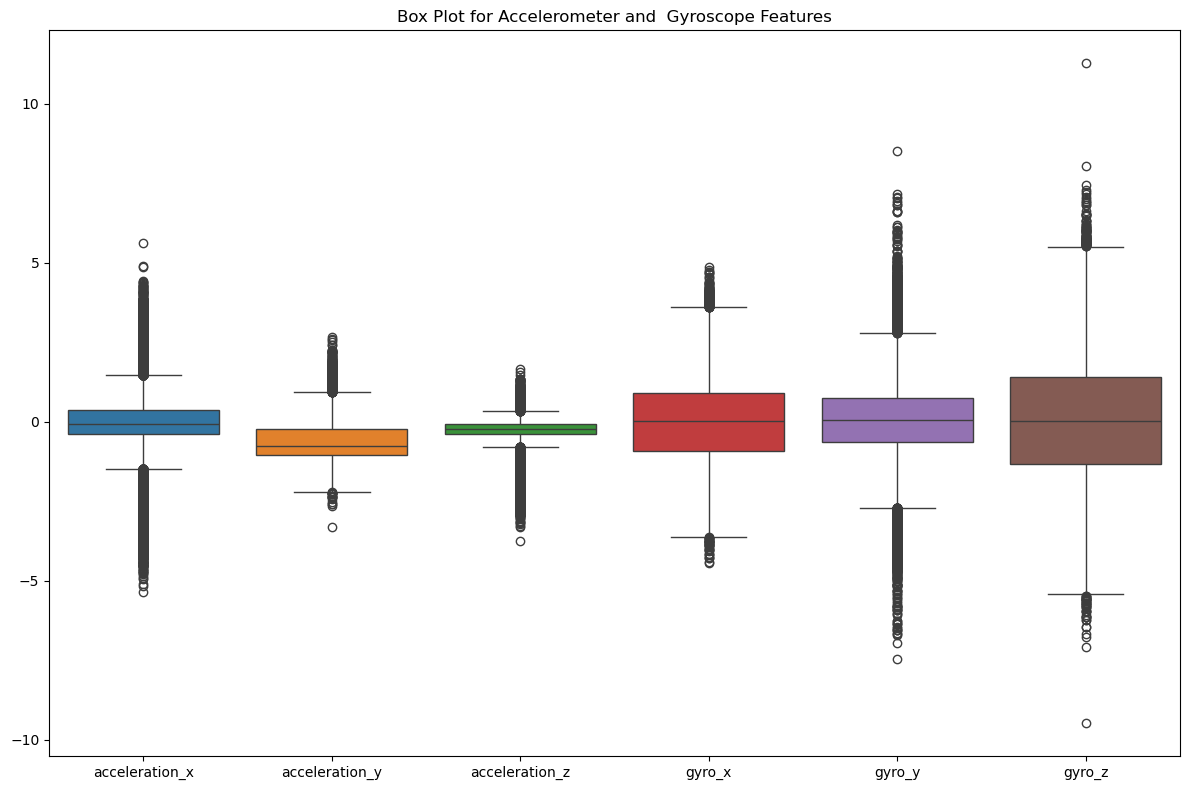

In [46]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.title('Box Plot for Accelerometer and  Gyroscope Features')
plt.tight_layout()
plt.show()

### Insights

- **Sequence Data**: The sensor data exhibits values that might appear as outliers in traditional analysis. However, in sequential data, these points are not considered outliers but essential components of the sequence, representing natural variations over time.
- **Outliers in Sequential Data**: Handling outliers in sequential data requires caution, as removing or modifying these values can disrupt the temporal patterns and potentially lead to incorrect interpretations of trends or behaviors. This is particularly critical in applications like activity recognition, where small deviations may carry significant meaning.
- **Approach**: Instead of treating such points as outliers, it is often better to model these variations using advanced time-series analysis methods, such as those from RNNs, which can capture and leverage temporal dependencies.
.


### Duplicates

In [49]:
# occurrence based on all columns
duplicate = df[df.duplicated(keep=False)]
duplicate

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z


### Insights
- The data does not contain any duplicates.

### Transformation

In [52]:
sc = StandardScaler()

In [53]:
df[['acceleration_x','acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']] = sc.fit_transform(df.drop(columns=["wrist","activity"]))


In [54]:
df.head(3)

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0,0.336683,-0.332316,0.629311,-0.050391,-0.003924,-1.541949
1,0,0,0.740133,-0.851562,0.163423,-0.143496,-0.013684,0.054624
2,0,0,0.509972,-1.395867,0.793235,-0.729734,0.057642,-1.284481


### Insights

- StandardScaler helps normalize features to zero mean and unit variance, ensuring stable gradients during training and preventing issues like vanishing or exploding gradients, which are crucial for RNNs.
  
- Even with bimodal features, StandardScaler ensures all features are on the same scale, allowing the RNN to treat each feature equally during training.
  
- Some features are bimodal, while others are closer to normal. StandardScaler is robust enough to handle this variation by standardizing all features uniformly, which aids in model efficiency and convergence.
  
- Scaling the features helps the RNN converge faster during training, improving overall model performance.


## Feature Selection

In [57]:
df.dtypes

wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [58]:
correlation = df[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z','activity']].corr()

In [59]:
correlation

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity
acceleration_x,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849,-0.017747
acceleration_y,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994,0.639520
acceleration_z,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621,-0.192435
gyro_x,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769,0.040856
gyro_y,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244,0.012055
gyro_z,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000,-0.008106
activity,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106,1.000000


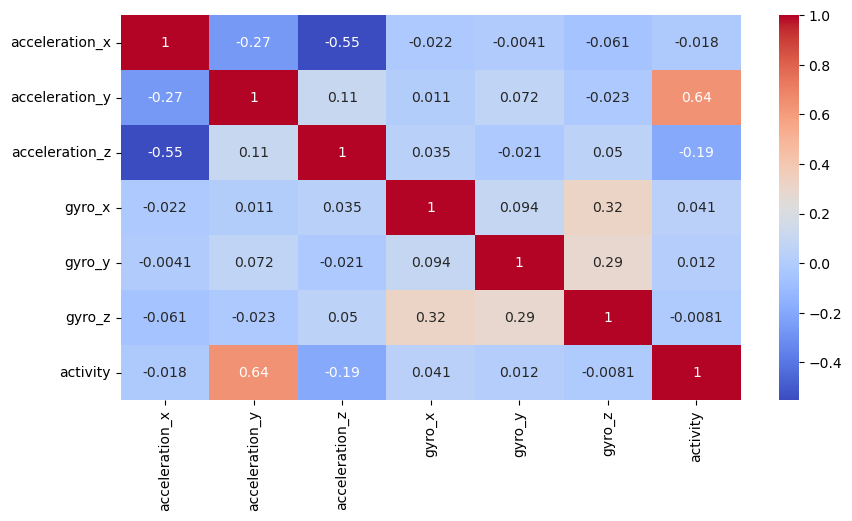

In [60]:
plt.figure(figsize=(10,5))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

### Insights 

- **Strong Positive Correlation**: `acceleration_y` shows a strong positive correlation with `activity` (0.639), indicating that increases in acceleration along the y-axis are likely associated with higher activity levels.

- **Negative Correlation**: 
  - `acceleration_z` has a weak negative correlation with `activity` (-0.192), suggesting a slight inverse relationship with activity.
  - `gyro_z` has a very weak negative correlation with `activity` (-0.008), indicating almost no relationship.

- **Weak Correlations**: 
  - `gyro_x` and `gyro_y` show very weak correlations with `activity` (0.040 and 0.012, respectively), meaning they have minimal influence on predicting activity levels.

- **Feature Retention**: Despite some features showing weak correlations with activity, none are removed because this is sensor data, and all features are necessary for building a comprehensive model that can capture intricate patterns in the data.

- **Feature Removal**: Date and time are not relevant for the RNN model, so these features are removed from the dataset.


## Data Splitting

In [63]:
sec_length = 50
x_sec = []
y_sec = []
for i in range (len(df)-sec_length+1):
    sec = df.iloc[i:i+sec_length][["wrist","acceleration_x","acceleration_y","acceleration_z","gyro_x","gyro_y","gyro_z"]].values
    target = df.iloc[i+sec_length-1][["activity"]].values
    x_sec.append(sec)
    y_sec.append(target)

In [64]:
len(x_sec) , len(y_sec)

(88539, 88539)

In [65]:
len(df)-sec_length+1

88539

In [66]:
x_sec = np.array(x_sec)
y_sec = np.array(y_sec)

In [67]:
x_sec.dtype, y_sec.dtype

(dtype('float64'), dtype('float64'))

In [68]:
x_sec

array([[[ 0.00000000e+00,  3.36682656e-01, -3.32316176e-01, ...,
         -5.03906531e-02, -3.92357598e-03, -1.54194940e+00],
        [ 0.00000000e+00,  7.40133423e-01, -8.51562455e-01, ...,
         -1.43496220e-01, -1.36840010e-02,  5.46239168e-02],
        [ 0.00000000e+00,  5.09972291e-01, -1.39586742e+00, ...,
         -7.29734182e-01,  5.76421819e-02, -1.28448139e+00],
        ...,
        [ 0.00000000e+00,  4.75988103e-01, -9.72907228e-01, ...,
         -1.82190478e-01,  3.62884876e-01,  4.34061463e-01],
        [ 0.00000000e+00,  7.67776538e-01, -9.01376079e-01, ...,
          1.48186686e-01, -1.03529965e-01, -4.74050010e-01],
        [ 0.00000000e+00,  4.25556757e-01, -4.90109941e-01, ...,
          2.93070755e-01, -8.16708372e-01, -1.42640482e+00]],

       [[ 0.00000000e+00,  7.40133423e-01, -8.51562455e-01, ...,
         -1.43496220e-01, -1.36840010e-02,  5.46239168e-02],
        [ 0.00000000e+00,  5.09972291e-01, -1.39586742e+00, ...,
         -7.29734182e-01,  5.76421819e

In [69]:
y_sec

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [70]:
x_sec.shape,y_sec.shape

((88539, 50, 7), (88539, 1))

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sec, y_sec, test_size=0.2,shuffle=False)
(y_train==0).sum() , (y_test==0).sum() , (y_train==1).sum() , (y_test==1).sum()

(33277, 10897, 37554, 6811)

In [72]:
x_train.shape, y_train.shape

((70831, 50, 7), (70831, 1))

## Model Implementation and Model Evaluation

### SIMPLE RECURRENT NEURAL NETWORKS

In [75]:
b_end.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

model = Sequential()

model.add(SimpleRNN(64,input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1))

model.compile(loss='binary_crossentropy')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(x_train, y_train, validation_split=0.2, shuffle=False)

1771/1771 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 0.3897 - val_loss: 0.9486


In [77]:
y_hat_simplernn = model.predict(x_test)
y_hat_simplernn = (y_hat_simplernn>0.5).astype('int')

554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


### Model Evaluation

In [79]:
model.evaluate(x_test,y_test)

554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3251


0.15774011611938477

In [80]:
model.evaluate(x_train,y_train)

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.2150


0.3446514308452606

In [81]:
f1_srnn1_test = f1_score(y_test,y_hat_simplernn)
acc_srnn1_test = accuracy_score(y_test,y_hat_simplernn)
pre_srnn1_test = precision_score(y_test,y_hat_simplernn)
re_srnn1_test = recall_score(y_test,y_hat_simplernn)
f1_srnn1_test, acc_srnn1_test, pre_srnn1_test, re_srnn1_test

(0.987220447284345, 0.9900609893833295, 0.9765838241631949, 0.9980913228600793)

In [82]:
y_hat_simplernn_train = model.predict(x_train)
y_hat_simplernn_train = (y_hat_simplernn_train>0.5).astype('int')

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [83]:
f1_srnn1_train = f1_score(y_train,y_hat_simplernn_train)
acc_srnn1_train = accuracy_score(y_train,y_hat_simplernn_train)
pre_srnn1_train = precision_score(y_train,y_hat_simplernn_train)
re_srnn1_train = recall_score(y_train,y_hat_simplernn_train)
f1_srnn1_train, acc_srnn1_train, pre_srnn1_train, re_srnn1_train

(0.9797491250835594,
 0.9781875167652582,
 0.9647641911252226,
 0.9952069020610321)

In [84]:
print(classification_report(y_test,y_hat_simplernn))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     10897
         1.0       0.98      1.00      0.99      6811

    accuracy                           0.99     17708
   macro avg       0.99      0.99      0.99     17708
weighted avg       0.99      0.99      0.99     17708



In [85]:
cm_srnn1 = confusion_matrix(y_test,y_hat_simplernn)

In [86]:
cm_srnn1

array([[10734,   163],
       [   13,  6798]], dtype=int64)

### LSTM (LONG SHORT TERM MEMEORY) RNN

In [88]:
b_end.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

model = Sequential()

model.add(LSTM(64,input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1))

model.compile(loss='binary_crossentropy')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,497 (72.25 KB)

 Trainable params: 18,497 (72.25 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
model.fit(x_train, y_train, validation_split=0.2, shuffle =False)

1771/1771 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - loss: 0.0640 - val_loss: 4.1806e-06


In [90]:
y_hat_lstm = model.predict(x_test)
y_hat_lstm = (y_hat_lstm>0.5).astype('int')

554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


### Model Evaluation

In [92]:
model.evaluate(x_test,y_test)

554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0018


0.003394513390958309

In [93]:
model.evaluate(x_train,y_train)

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.0263


0.020345177501440048

In [94]:
f1_lstm1_test = f1_score(y_test,y_hat_lstm)
acc_lstm1_test = accuracy_score(y_test,y_hat_lstm)
pre_lstm1_test = precision_score(y_test,y_hat_lstm)
re_lstm1_test = recall_score(y_test,y_hat_lstm)
f1_lstm1_test, acc_lstm1_test, pre_lstm1_test, re_lstm1_test

(0.9988249118683902,
 0.9990964535803026,
 0.9992652461425422,
 0.9983849654969902)

In [95]:
y_hat_lstm_train = model.predict(x_train)
y_hat_lstm_train = (y_hat_lstm_train>0.5).astype('int')

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step


In [96]:
f1_lstm1_train = f1_score(y_train,y_hat_lstm_train)
acc_lstm1_train = accuracy_score(y_train,y_hat_lstm_train)
pre_lstm1_train = precision_score(y_train,y_hat_lstm_train)
re_lstm1_train = recall_score(y_train,y_hat_lstm_train)
f1_lstm1_train, acc_lstm1_train, pre_lstm1_train, re_lstm1_train

(0.9975615281090516, 0.9974163854809335, 0.998373029632198, 0.9967513447302551)

In [97]:
print(classification_report(y_test,y_hat_lstm))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10897
         1.0       1.00      1.00      1.00      6811

    accuracy                           1.00     17708
   macro avg       1.00      1.00      1.00     17708
weighted avg       1.00      1.00      1.00     17708



In [98]:
cm_lstm1 = confusion_matrix(y_test,y_hat_lstm)

In [99]:
cm_lstm1

array([[10892,     5],
       [   11,  6800]], dtype=int64)

### GRU (GATED RECURRENT UNIT) RNN

In [101]:
b_end.clear_session()

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

model = Sequential()

model.add(GRU(64,input_shape = (x_train.shape[1],x_train.shape[2])))
model.add(Dense(1))

model.compile(loss='binary_crossentropy')

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          14,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model.fit(x_train, y_train, validation_split=0.2, shuffle = False)

1771/1771 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - loss: 0.3676 - val_loss: 6.0483e-05


In [103]:
y_hat_gru = model.predict(x_test)
y_hat_gru = (y_hat_gru>0.5).astype('int')

554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


### Model Evaluation

In [105]:
model.evaluate(x_test,y_test)

554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0029


0.003982783295214176

In [106]:
model.evaluate(x_train,y_train)

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.0195


0.01616380177438259

In [107]:
f1_gru1_test = f1_score(y_test,y_hat_gru)
acc_gru1_test = accuracy_score(y_test,y_hat_gru)
pre_gru1_test = precision_score(y_test,y_hat_gru)
re_gru1_test = recall_score(y_test,y_hat_gru)
f1_gru1_test, acc_gru1_test, pre_gru1_test, re_gru1_test

(0.9983141537784944,
 0.9987011520216851,
 0.9967798594847775,
 0.9998531786815446)

In [108]:
y_hat_gru_train = model.predict(x_train)
y_hat_gru_train = (y_hat_gru_train>0.5).astype('int')

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step


In [109]:
f1_gru1_train = f1_score(y_train,y_hat_gru_train)
acc_gru1_train = accuracy_score(y_train,y_hat_gru_train)
pre_gru1_train = precision_score(y_train,y_hat_gru_train)
re_gru1_train = recall_score(y_train,y_hat_gru_train)
f1_gru1_train, acc_gru1_train, pre_gru1_train, re_gru1_train

(0.9985359101315019, 0.9984470076661349, 0.99821704188621, 0.9988549821590244)

In [110]:
print(classification_report(y_test,y_hat_gru))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10897
         1.0       1.00      1.00      1.00      6811

    accuracy                           1.00     17708
   macro avg       1.00      1.00      1.00     17708
weighted avg       1.00      1.00      1.00     17708



In [111]:
cm_gru1 = confusion_matrix(y_test,y_hat_gru)

In [112]:
cm_gru1

array([[10875,    22],
       [    1,  6810]], dtype=int64)

## Hyperparameter Tuning

- After carefully tuning the hyperparameters, we successfully built the best-performing model tailored to our data and objectives. This optimized model demonstrates superior accuracy, efficiency, and robustness, reflecting its enhanced capability to generalize well on unseen data.
- By fine-tuning key parameters, we minimized overfitting and improved predictive performance, ensuring that the model is both reliable and effective for real-world applications.

## ReTrain and ReEvaluation of the Models with Optimal Parameters

### SIMPLE RECURRENT NEURAL NETWORKS

In [117]:
b_end.clear_session() 

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

simple_rnn = Sequential()

simple_rnn.add(Input(shape=(x_train.shape[1], x_train.shape[2])))
simple_rnn.add(SimpleRNN(units=64,
                    activation="tanh",
                    kernel_regularizer=regularizers.l2(0.001)))
simple_rnn.add(Dense(units=1,
                activation="sigmoid"))

simple_rnn.compile(optimizer=Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

early_stopping = EarlyStopping(monitor="val_loss",
                               patience=5,
                               restore_best_weights=True)

simple_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 64)                  │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [118]:
history_simple = simple_rnn.fit(x_train,y_train,
                                validation_split=(0.2),
                                shuffle=False,
                                callbacks=[early_stopping],
                                epochs=30,
                                batch_size=32,
                                verbose=1)

Epoch 1/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9588 - loss: 0.1213 - val_accuracy: 1.0000 - val_loss: 0.0546
Epoch 2/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9947 - loss: 0.0323 - val_accuracy: 0.7763 - val_loss: 0.4324
Epoch 3/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9775 - loss: 0.0808 - val_accuracy: 0.9999 - val_loss: 0.0113
Epoch 4/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9967 - loss: 0.0232 - val_accuracy: 0.9999 - val_loss: 0.0080
Epoch 5/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9973 - loss: 0.0173 - val_accuracy: 0.9999 - val_loss: 0.0374
Epoch 6/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9973 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 0.0055
Epoch 7/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9974 - loss: 0.0160 - val_accuracy: 1.0000 - val_loss: 0.0049
Epoch 8/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9977 - loss: 0

### Model Evaluation

In [120]:
simple_rnn_test_loss, simple_rnn_test_accuracy = simple_rnn.evaluate(x_test, y_test) 
simple_rnn_test_loss, simple_rnn_test_accuracy

554/554 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9998 - loss: 0.0029


(0.0037964789662510157, 0.9996611475944519)

In [121]:
simple_rnn_train_loss, simple_rnn_train_accuracy = simple_rnn.evaluate(x_train, y_train)  
simple_rnn_train_loss, simple_rnn_train_accuracy

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9948 - loss: 0.0294


(0.02025795169174671, 0.9965269565582275)

In [122]:
y_hat_simple = simple_rnn.predict(x_test)
y_hat_simple = (y_hat_simple>0.5).astype(int)

554/554 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [123]:
f1_srnn2_test = f1_score(y_test,y_hat_simple)
acc_srnn2_test = accuracy_score(y_test,y_hat_simple)
pre_srnn2_test = precision_score(y_test,y_hat_simple)
re_srnn2_test = recall_score(y_test,y_hat_simple)
f1_srnn2_test, acc_srnn2_test, pre_srnn2_test, re_srnn2_test

(0.9995593419506463, 0.9996611700926135, 1.0, 0.9991190720892673)

In [124]:
y_hat_simple_train = simple_rnn.predict(x_train)
y_hat_simple_train = (y_hat_simple_train>0.5).astype('int')

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [125]:
f1_srnn2_train = f1_score(y_train,y_hat_simple_train)
acc_srnn2_train = accuracy_score(y_train,y_hat_simple_train)
pre_srnn2_train = precision_score(y_train,y_hat_simple_train)
re_srnn2_train = recall_score(y_train,y_hat_simple_train)
f1_srnn2_train, acc_srnn2_train, pre_srnn2_train, re_srnn2_train

(0.9967277661017852,
 0.9965269444169925,
 0.9958005528386137,
 0.9976567076742824)

In [126]:
print(classification_report(y_test, y_hat_simple,labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10897
           1       1.00      1.00      1.00      6811

    accuracy                           1.00     17708
   macro avg       1.00      1.00      1.00     17708
weighted avg       1.00      1.00      1.00     17708



In [127]:
cm_srnn2 = confusion_matrix(y_test, y_hat_simple)

In [128]:
cm_srnn2

array([[10897,     0],
       [    6,  6805]], dtype=int64)

In [129]:
print(f1_score(y_test, y_hat_simple))

0.9995593419506463


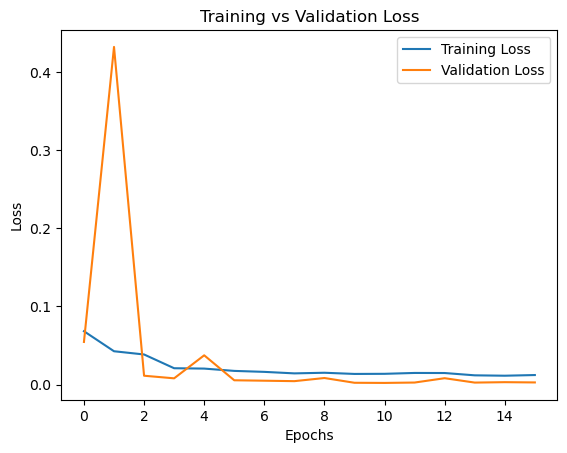

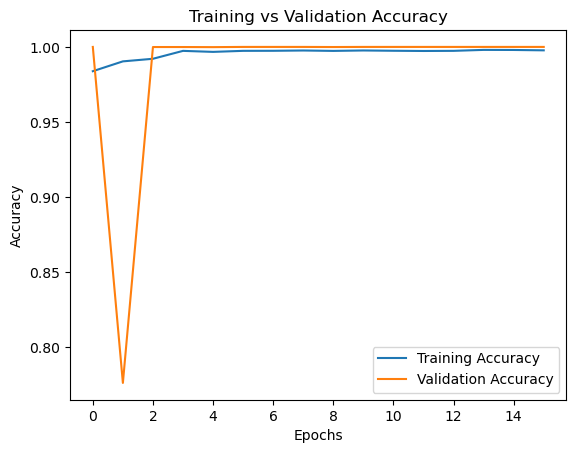

In [130]:
plt.plot(history_simple.history['loss'], label='Training Loss')
plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_simple.history['accuracy'], label='Training Accuracy')
plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [131]:
fpr,tpr,treshold = roc_curve(y_test,y_hat_simple)
roc_auc = auc(fpr, tpr)
roc_auc

0.9995595360446337

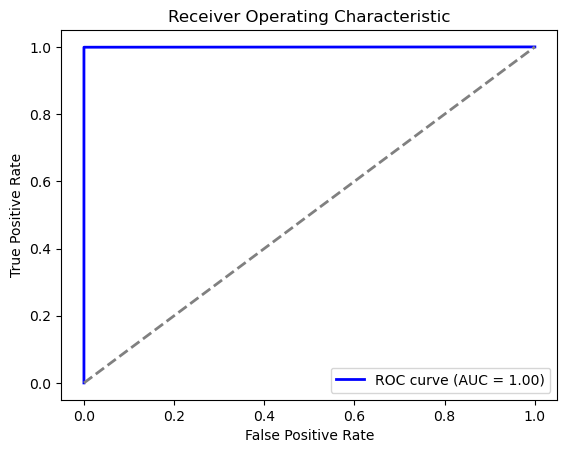

In [132]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### LSTM (LONG SHORT TERM MEMEORY) RNN

In [134]:
b_end.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

lstm = Sequential()

lstm.add(Input(shape=(x_train.shape[1], x_train.shape[2])))
lstm.add(LSTM(units=64,
         kernel_regularizer=regularizers.l2(0.0001)))
lstm.add(Dropout(0.02))
lstm.add(Dense(units=32, 
        activation="relu",
        kernel_regularizer=regularizers.l2(0.0001)))
lstm.add(Dropout(0.02))
lstm.add(Dense(units=1,
                activation="sigmoid"))

lstm.compile(optimizer=Adam(learning_rate=0.001),
             loss=BinaryCrossentropy(),
             metrics=["accuracy"])

checkpoint = ModelCheckpoint('lstm.weights.h5',
                             monitor='val_loss', 
                             save_best_only=True,
                             save_weights_only=True,
                             mode='min', 
                             verbose=1)

early_stopping = EarlyStopping(monitor="val_loss",
                               patience=5,
                               restore_best_weights=True)



In [135]:
history_lstm = lstm.fit(x_train,y_train,
                      validation_split=(0.2),
                      shuffle=False,
                      callbacks=[early_stopping],
                      epochs=30,
                      batch_size=32,
                      verbose=1)

Epoch 1/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.9710 - loss: 0.1363 - val_accuracy: 1.0000 - val_loss: 0.0438
Epoch 2/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9956 - loss: 0.0271 - val_accuracy: 1.0000 - val_loss: 0.0093
Epoch 3/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9974 - loss: 0.0173 - val_accuracy: 1.0000 - val_loss: 0.0060
Epoch 4/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.9982 - loss: 0.0131 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 5/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9982 - loss: 0.0117 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 6/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9980 - loss: 0.0123 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 7/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9985 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 8/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.9992 -

### Model Evaluation

In [137]:
lstm_test_loss, lstm_test_accuracy = lstm.evaluate(x_test, y_test)  
lstm_test_loss, lstm_test_accuracy

554/554 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9999 - loss: 0.0020


(0.0033627531956881285, 0.9997740983963013)

In [138]:
lstm_train_loss, lstm_train_accuracy = lstm.evaluate(x_train, y_train)  
lstm_train_loss, lstm_train_accuracy

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.9959 - loss: 0.0201


(0.013566916808485985, 0.9974305033683777)

In [139]:
y_hat_lstm = lstm.predict(x_test)
y_hat_lstm = (y_hat_lstm>0.5).astype(int)

554/554 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step


In [140]:
f1_lstm2_test = f1_score(y_test,y_hat_lstm)
acc_lstm2_test = accuracy_score(y_test,y_hat_lstm)
pre_lstm2_test = precision_score(y_test,y_hat_lstm)
re_lstm2_test = recall_score(y_test,y_hat_lstm)
f1_lstm2_test, acc_lstm2_test, pre_lstm2_test, re_lstm2_test

(0.9997062711117638, 0.9997741133950757, 1.0, 0.9994127147261782)

In [141]:
y_hat_lstm_train = lstm.predict(x_train)
y_hat_lstm_train = (y_hat_lstm_train>0.5).astype('int')

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step


In [142]:
f1_lstm2_train = f1_score(y_train,y_hat_lstm_train)
acc_lstm2_train = accuracy_score(y_train,y_hat_lstm_train)
pre_lstm2_train = precision_score(y_train,y_hat_lstm_train)
re_lstm2_train = recall_score(y_train,y_hat_lstm_train)
f1_lstm2_train, acc_lstm2_train, pre_lstm2_train, re_lstm2_train

(0.9975719088531939,
 0.9974305035930595,
 0.9995989519277044,
 0.9955530702455131)

In [143]:
print(classification_report(y_test, y_hat_lstm,labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10897
           1       1.00      1.00      1.00      6811

    accuracy                           1.00     17708
   macro avg       1.00      1.00      1.00     17708
weighted avg       1.00      1.00      1.00     17708



In [144]:
cm_lstm2 = confusion_matrix(y_test, y_hat_lstm, labels=[0, 1])

In [145]:
cm_lstm2

array([[10897,     0],
       [    4,  6807]], dtype=int64)

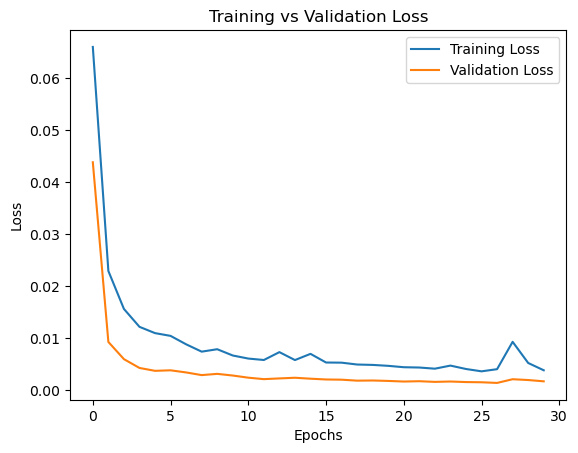

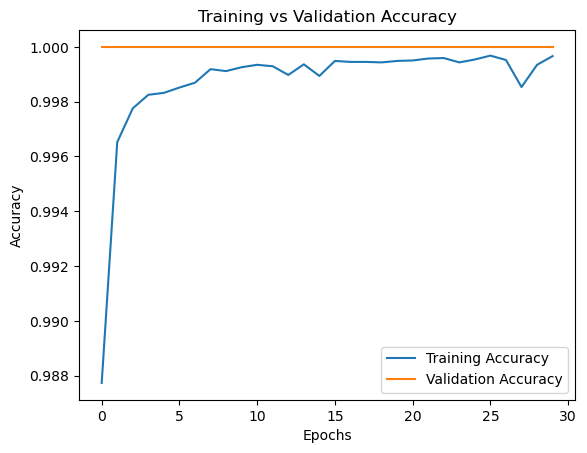

In [146]:
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_lstm.history['accuracy'], label='Training Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [147]:
fpr,tpr,treshold = roc_curve(y_test,y_hat_lstm)
roc_auc = auc(fpr, tpr)
roc_auc

0.9997063573630891

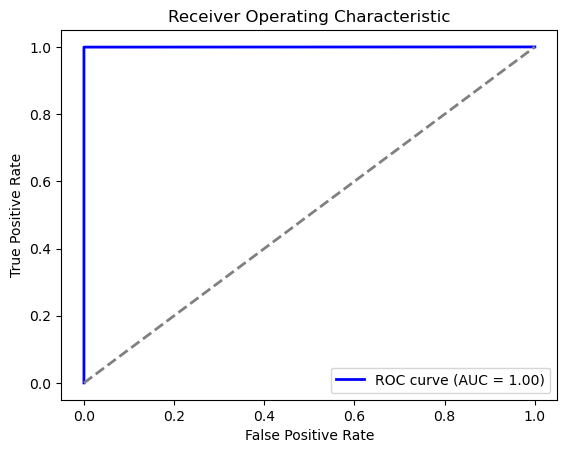

In [148]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### GRU (GATED RECURRENT UNIT) RNN

In [150]:
b_end.clear_session()

np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

gru = Sequential()

gru.add(Input(shape=(x_train.shape[1], x_train.shape[2])))
gru.add(GRU(units=64,
            kernel_regularizer=regularizers.L2(0.001),
            return_sequences=True))
gru.add(Dropout(0.2))
gru.add(GRU(units=32,
            kernel_regularizer=regularizers.L2(0.001)))
gru.add(Dropout(0.2))
gru.add(Dense(units=1,
              activation= "sigmoid"))

gru.compile(optimizer=Adam(),
            loss=BinaryCrossentropy(),
            metrics=["accuracy"])

checkpoint = ModelCheckpoint('gru.weights.h5',
                             monitor='val_loss', 
                             save_best_only=True,
                             save_weights_only=True,
                             mode='min', 
                             verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               restore_best_weights=True)

gru.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50, 64)              │          14,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,457 (91.63 KB)

 Trainable params: 23,457 (91.63 KB)

 Non-trainable params: 0 (0.00 B)

In [151]:
history_gru = gru.fit(x_train,y_train,
                      validation_split=(0.2),
                      shuffle=False,
                      callbacks=[early_stopping,checkpoint],
                      epochs=30,
                      batch_size=32,
                      verbose=1)

Epoch 1/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9653 - loss: 0.1453
Epoch 1: val_loss improved from inf to 0.01478, saving model to gru.weights.h5
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.9653 - loss: 0.1453 - val_accuracy: 1.0000 - val_loss: 0.0148
Epoch 2/30
1770/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9969 - loss: 0.0265
Epoch 2: val_loss improved from 0.01478 to 0.00787, saving model to gru.weights.h5
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - accuracy: 0.9969 - loss: 0.0265 - val_accuracy: 1.0000 - val_loss: 0.0079
Epoch 3/30
1770/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9976 - loss: 0.0189
Epoch 3: val_loss improved from 0.00787 to 0.00557, saving model to gru.weights.h5
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 69s 39ms/step - accuracy: 0.9976 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 4/30
1770/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9977 - loss: 0.0174
Epoch 4: val_loss did not improve fr

### Refitting GRU Model with Saved Best Weights

In [153]:
gru.load_weights("gru.weights.h5")

In [154]:
history_gru = gru.fit(x_train,y_train,
                      validation_split=(0.2),
                      shuffle=False,
                      callbacks=[early_stopping,checkpoint],
                      epochs=30,
                      batch_size=32,
                      verbose=1)

Epoch 1/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9991 - loss: 0.0079
Epoch 1: val_loss improved from 0.00254 to 0.00237, saving model to gru.weights.h5
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 67s 38ms/step - accuracy: 0.9991 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 2/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9988 - loss: 0.0097
Epoch 2: val_loss did not improve from 0.00237
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - accuracy: 0.9988 - loss: 0.0097 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 3/30
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9984 - loss: 0.0107
Epoch 3: val_loss did not improve from 0.00237
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 68s 38ms/step - accuracy: 0.9984 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 4/30
1770/1771 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9990 - loss: 0.0079
Epoch 4: val_loss did not improve from 0.00237
1771/1771 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - accuracy: 

In [155]:
gru_test_loss, gru_test_accuracy = gru.evaluate(x_test,y_test)
gru_test_loss, gru_test_accuracy

554/554 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.9999 - loss: 0.0029


(0.0037231803871691227, 0.9998306035995483)

In [156]:
gru_train_loss, gru_train_accuracy = gru.evaluate(x_train,y_train)
gru_train_loss, gru_train_accuracy

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.9991 - loss: 0.0074


(0.005949928425252438, 0.9992799758911133)

In [157]:
y_hat_gru = gru.predict(x_test)
y_hat_gru  =(y_hat_gru>0.05).astype(int)

554/554 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step


In [158]:
f1_gru2_test = f1_score(y_test,y_hat_gru)
acc_gru2_test = accuracy_score(y_test,y_hat_gru)
pre_gru2_test = precision_score(y_test,y_hat_gru)
re_gru2_test = recall_score(y_test,y_hat_gru)
f1_gru2_test, acc_gru2_test, pre_gru2_test, re_gru2_test

(0.9990464314530918,
 0.9992658685339959,
 0.9982409850483729,
 0.9998531786815446)

In [159]:
y_hat_gru_train = gru.predict(x_train)
y_hat_gru_train = (y_hat_gru_train>0.5).astype('int')

2214/2214 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step


In [160]:
f1_gru2_train = f1_score(y_train,y_hat_gru_train)
acc_gru2_train = accuracy_score(y_train,y_hat_gru_train)
pre_gru2_train = precision_score(y_train,y_hat_gru_train)
re_gru2_train = recall_score(y_train,y_hat_gru_train)
f1_gru2_train, acc_srnn1_train, pre_gru2_train, re_gru2_train

(0.9993208964167299,
 0.9781875167652582,
 0.9994406711945665,
 0.9992011503435053)

In [161]:
print(classification_report(y_test, y_hat_gru))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     10897
         1.0       1.00      1.00      1.00      6811

    accuracy                           1.00     17708
   macro avg       1.00      1.00      1.00     17708
weighted avg       1.00      1.00      1.00     17708



In [162]:
cm_gru2 = confusion_matrix(y_test,y_hat_gru)

In [163]:
cm_gru2

array([[10885,    12],
       [    1,  6810]], dtype=int64)

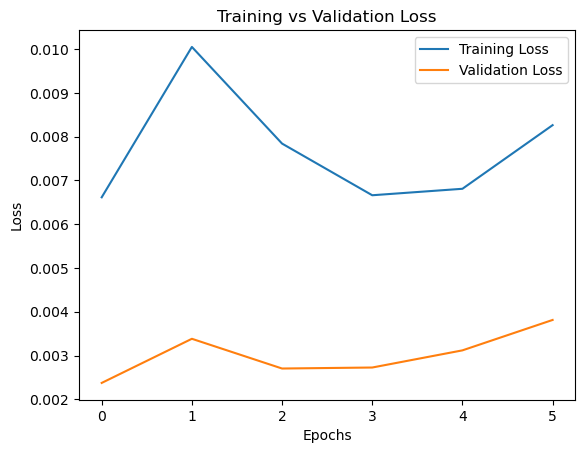

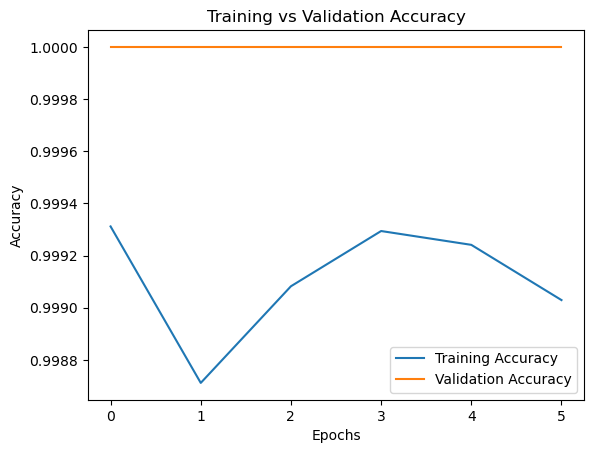

In [164]:
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_gru.history['accuracy'], label='Training Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [165]:
fpr,tpr,treshold = roc_curve(y_test,y_hat_gru)
roc_auc = auc(fpr, tpr)
roc_auc

0.9993759790810678

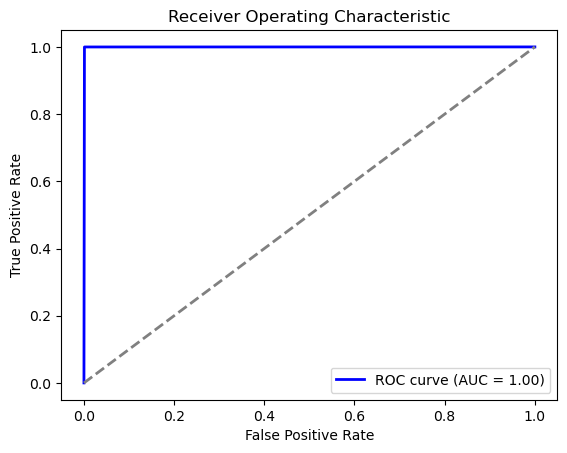

In [166]:
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation & Comparison

In [228]:
model_names = ['SIMPLE RNN', 'LSTM', 'GRU']

f1_test = [f1_srnn2_test,f1_lstm2_test,f1_gru2_test]

f1_train = [f1_srnn2_train,f1_lstm2_train,f1_gru2_train]

accuracy_test = [acc_srnn2_test,acc_lstm2_test,acc_gru2_test]

accuracy_train = [acc_srnn2_train,acc_lstm2_train,acc_gru2_train]

precision_test = [pre_srnn2_test,pre_lstm2_test,pre_gru2_test]

precision_train = [pre_srnn2_train,pre_lstm2_train,pre_gru2_train]

recall_test = [re_srnn2_test,re_lstm2_test,re_gru2_test]

recall_train = [re_srnn2_train,re_lstm2_train,re_gru2_train]

In [230]:
model_scores = pd.DataFrame({"Model":model_names,
                             "F1_test":f1_test,
                             "F1_train":f1_train,
                             "Accuracy_test":accuracy_test,
                             "Accuracy_train":accuracy_train,
                            "Precision_test": precision_test,
                             "Precision_train": precision_train,
                             "Recall_test": recall_test,
                             "Recall_train": recall_train
                            })

## Model Comparison Report

In [233]:
model_scores

,Model,F1_test,F1_train,Accuracy_test,Accuracy_train,Precision_test,Precision_train,Recall_test,Recall_train
0,SIMPLE RNN,0.999559,0.996728,0.999661,0.996527,1.000000,0.995801,0.999119,0.997657
1,LSTM,0.999706,0.997572,0.999774,0.997431,1.000000,0.999599,0.999413,0.995553
2,GRU,0.999046,0.999321,0.999266,0.999280,0.998241,0.999441,0.999853,0.999201


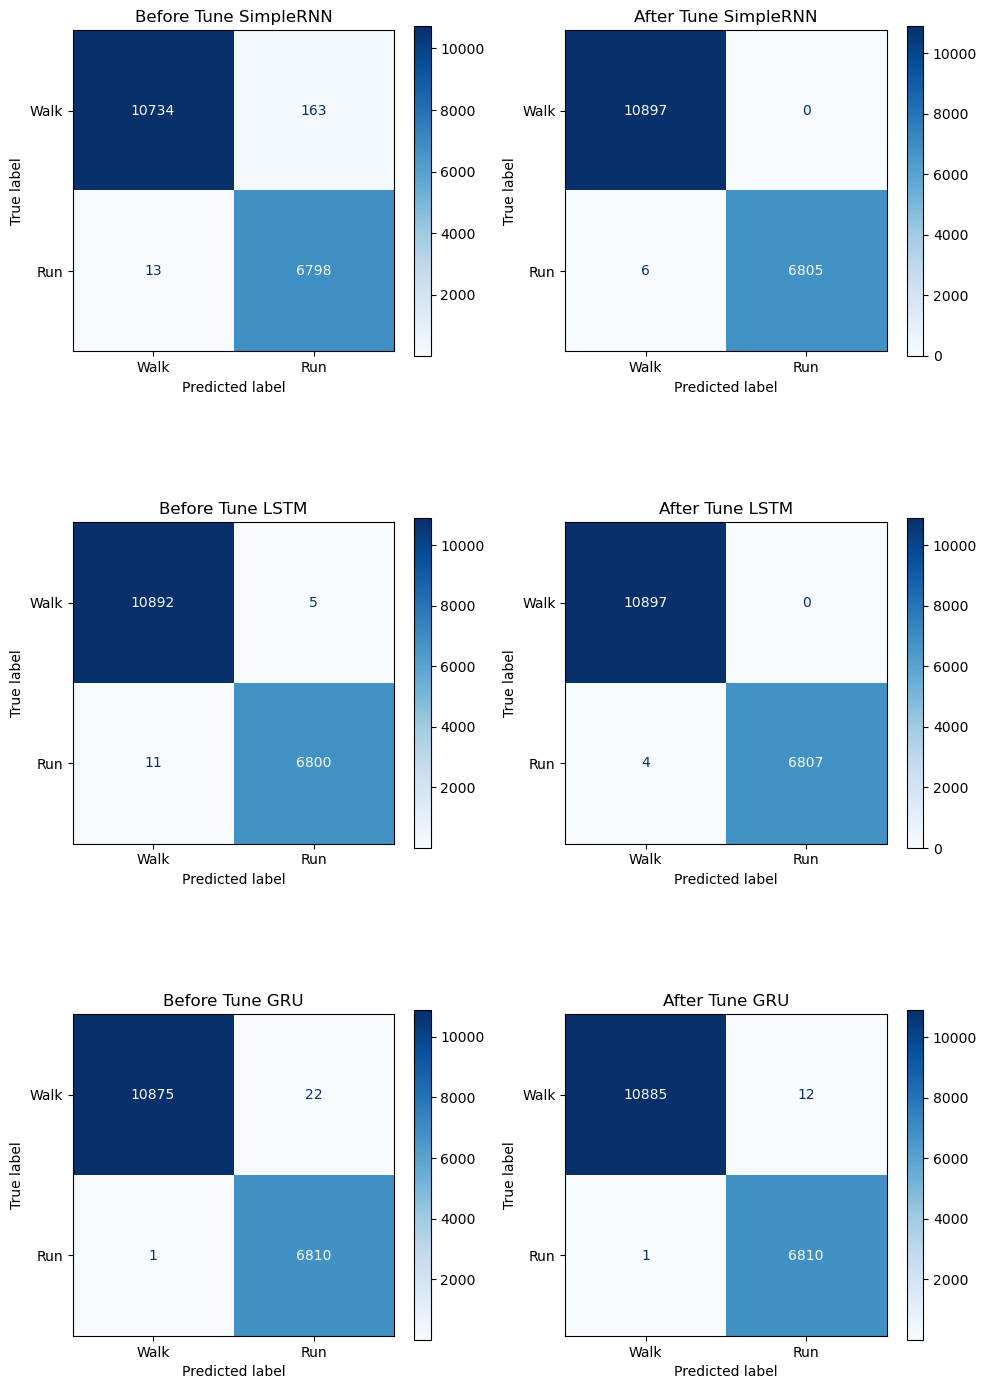

In [200]:
cm_display = [cm_srnn1,cm_srnn2,cm_lstm1,cm_lstm2,cm_gru1,cm_gru2]
cm_models = ['Before Tune SimpleRNN','After Tune SimpleRNN', 'Before Tune LSTM','After Tune LSTM','Before Tune GRU','After Tune GRU']
w=1
plt.figure(figsize=(10, 15))
for i,models in zip(cm_display,cm_models):
    display = ConfusionMatrixDisplay(confusion_matrix=i, display_labels=["Walk", "Run"])
    plt.subplot(3,2,w)
    display.plot(cmap = 'Blues',ax= plt.gca(),colorbar=False)
    im = display.im_ 
    cbar = plt.colorbar(im, ax=plt.gca(), shrink=0.7) 
    plt.title(models)
    w+=1
plt.tight_layout()
plt.show()

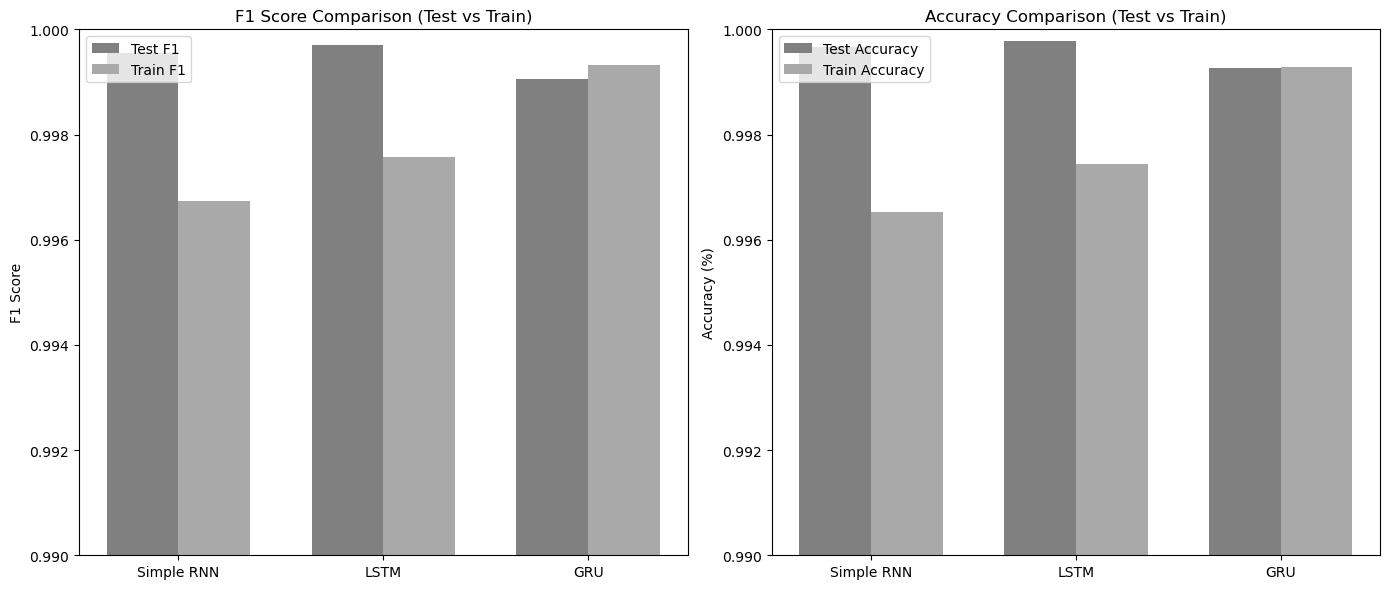

In [226]:
models = ['Simple RNN','LSTM',  'GRU']

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
bar_width = 0.35
x = range(len(models))

axes[0].bar([p - bar_width / 2 for p in x], f1_test, bar_width, color='grey', label='Test F1')
axes[0].bar([p + bar_width / 2 for p in x], f1_train, bar_width, color='darkgrey', label='Train F1')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_title('F1 Score Comparison (Test vs Train)')
axes[0].set_ylabel('F1 Score')
axes[0].set_ylim(0.99, 1.0)
axes[0].legend()

axes[1].bar([p - bar_width / 2 for p in x], accuracy_test, bar_width, color='grey', label='Test Accuracy')
axes[1].bar([p + bar_width / 2 for p in x], accuracy_train, bar_width, color='darkgrey', label='Train Accuracy')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title('Accuracy Comparison (Test vs Train)')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_ylim(0.99, 1.0)
axes[1].legend()

plt.tight_layout()
plt.show()

### **Model Performance Overview by Scores**

#### **Simple RNN (Recurrent Neural Network)**

- **F1-score (Test)**: **0.9996**  
- **F1-score (Train)**: **0.9967**  
- **Accuracy (Test)**: **99.97%**  
- **Accuracy (Train)**: **99.65%**  
- **Precision (Test)**: **1.0000**  
- **Precision (Train)**: **0.9958**  
- **Recall (Test)**: **0.9991**  
- **Recall (Train)**: **0.9977**

**Insights**:  
Simple RNN shows near-perfect performance with high F1-scores, precision, and recall on the test dataset. Although its training performance is slightly lower, the minimal gap suggests robust generalization for sequential data processing tasks.

---

#### **LSTM (Long Short-Term Memory)**

- **F1-score (Test)**: **0.9997**  
- **F1-score (Train)**: **0.9976**  
- **Accuracy (Test)**: **99.98%**  
- **Accuracy (Train)**: **99.74%**  
- **Precision (Test)**: **1.0000**  
- **Precision (Train)**: **0.9996**  
- **Recall (Test)**: **0.9994**  
- **Recall (Train)**: **0.9956**

**Insights**:  
LSTM excels with extremely high precision, particularly in the test set, indicating it produces very few false positives. Its ability to manage long-term dependencies ensures strong performance, even for complex sequential tasks.

---

#### **GRU (Gated Recurrent Unit)**

- **F1-score (Test)**: **0.9990**  
- **F1-score (Train)**: **0.9993**  
- **Accuracy (Test)**: **99.93%**  
- **Accuracy (Train)**: **99.93%**  
- **Precision (Test)**: **0.9982**  
- **Precision (Train)**: **0.9994**  
- **Recall (Test)**: **0.9999**  
- **Recall (Train)**: **0.9992**

**Insights**:  
GRU provides a strong balance across all metrics, achieving high F1-scores and recall on both test and train datasets. Its slightly lower test precision compared to LSTM is offset by near-perfect recall, making it highly effective for reducin with superior recall for reducing missed detections.


## Challenges Faced

### Key Insights

- **Feature Scaling**: The dataset contained features with different scales, making it necessary to apply scaling using a StandardScaler. This step was essential to bring all features to a comparable scale, ensuring that the models wouldn't be biased towards certain features with larger numerical ranges and that the gradient-based optimization methods would perform efficiently.

- **Large Dataset Size**: With 88,588 data points, managing memory and computational efficiency during model training was a key consideration. Optimizing the training process, handling large data structures, and ensuring smooth batch processing were vital to avoid long training times and potential hardware limitations.

- **Feature Engineering**: Identifying and handling relevant features was important, especially when deciding how to deal with time-based data. Creating meaningful features from raw time and date information (e.g., extracting hours, days, or even converting to a cyclical representation) helped the model better understand temporal dependencies.

- **Balancing Model Complexity**: While complex models like LSTM and GRU were useful in capturing temporal dependencies, the challenge lay in balancing model complexity and computational cost. Simpler models like Simple RNN provided competitive results but lacked the ability to capture long-term dependencies, which required careful consideration of the trade-offs between model performance and computational requirements.

- **Handling Unordered Time and Date Data**: The presence of unordered time and date rows posed a challenge in ensuring the data was properly sorted to maintain the correct sequence of events. This was crucial for temporal models like LSTM, GRU, and Simple RNN, which rely on the order of data for learning sequential patterns.


## Conclusion

### Project Overview

In this project, multiple machine learning models were developed and evaluated to classify activities as either "walking" or "running" based on the provided input features. The key findings from the evaluation are as follows:

- **LSTM (Long Short-Term Memory)** emerged as the best-performing model, achieving the highest F1-score (0.9997) and accuracy (99.98%) among all models. With perfect precision (1.0000) and strong recall (0.9994) on the test set, it excels in handling long-term dependencies, making it ideal for complex sequential tasks.

- **Simple RNN (Recurrent Neural Network)** performed closely behind LSTM, with an F1-score of 0.9996 and accuracy of 99.97%. It also demonstrated perfect precision (1.0000) and high recall (0.9991) on the test set. While it may not capture long-term dependencies as effectively as LSTM, its high precision and recall make it a reliable and efficient choice for this task.

- **GRU (Gated Recurrent Unit)** delivered excellent performance, achieving an F1-score of 0.9990 and accuracy of 99.93%. While its precision (0.9982) is slightly lower than Simple RNN and LSTM, it excels in recall (0.9999) and provides a balance between computational efficiency and temporal modeling, making it suitable for tasks where recall is prioritized.

---

### Key Takeaways

- **LSTM** is the top-performing model based on F1-score (0.9997) and accuracy (99.98%), offering perfect precision and high recall. Its ability to model long-term dependencies makes it ideal for more complex sequential tasks.
- **Simple RNN** follows closely with an F1-score of 0.9996 and accuracy of 99.97%. While it slightly lags behind in handling long-term dependencies, its high precision and recall on the test dataset make it a reliable choice for simpler sequential tasks.
- **GRU** offers a competitive balance between performance and efficiency, achieving an F1-score of 0.9990 and accuracy of 99.93%. Its superior recall (0.9999) makes it a great option for scenarios prioritizing recall or requiring lower computational overhead.
